## Objective
Notebook for the comparison of functional and biosynthetic potential identified from metagenomic and cosmid library sequencing, where functional potential is identified by PROKKA (Seemann 2014) and biosynthetic potenital by antiSMASH6. (Blin et al. 2021) Minimap2 (Li 2018) was used for BGC to BGC mapping, BiG-SCAPE (Navarro-Muñoz et al. 2020) for BGC clustering and CAT (Von Meijenfeldt et al. 2019) to identify contig and thus BGC taxonomy 
<br>
<br>

## References:
Seemann, T. (2014). Prokka: rapid prokaryotic genome annotation. Bioinformatics, 30(14), 2068-2069.
<br>
Blin, K., Shaw, S., Kloosterman, A. M., Charlop-Powers, Z., Van Wezel, G. P., Medema, M. H., & Weber, T. (2021). antiSMASH 6.0: improving cluster detection and comparison capabilities. Nucleic acids research, 49(W1), W29-W35.
<br>
Li, H. (2018). Minimap2: pairwise alignment for nucleotide sequences. Bioinformatics, 34(18), 3094-3100.
<br>
Navarro-Muñoz, J. C., Selem-Mojica, N., Mullowney, M. W., Kautsar, S. A., Tryon, J. H., Parkinson, E. I., ... & Medema, M. H. (2020). A computational framework to explore large-scale biosynthetic diversity. Nature chemical biology, 16(1), 60-68.
<br>
Von Meijenfeldt, F. B., Arkhipova, K., Cambuy, D. D., Coutinho, F. H., & Dutilh, B. E. (2019). Robust taxonomic classification of uncharted microbial sequences and bins with CAT and BAT. Genome biology, 20, 1-14.

In [1]:
import os
from Bio import SeqIO
import pandas as pd
import numpy as np
import json
import re
import itertools
import seaborn as sb
import matplotlib.pyplot as plt
import sqlite3
import pickle

# Comparing functional potential with PROKKA

In [2]:
Sp_sr_prokka_df = pd.read_csv("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/PROKKA/Sp_sr_PROKKA_07192022.tsv", sep='\t')
Sp_hy_prokka_df = pd.read_csv("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/PROKKA/Sp_hy_PROKKA_07182022.tsv", sep='\t')
MH_sr_prokka_df = pd.read_csv("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/PROKKA/MH_sr_PROKKA_07182022.tsv", sep='\t')
MH_hy_prokka_df = pd.read_csv("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/PROKKA/MH_hy_PROKKA_07182022.tsv", sep='\t')


In [3]:
# Calculate percentage of CDSs with COG predicted
print(len(Sp_sr_prokka_df))
print(len(Sp_sr_prokka_df[Sp_sr_prokka_df["ftype"] == "CDS"]))
print(len(set(Sp_sr_prokka_df[Sp_sr_prokka_df["ftype"] == "CDS"]["locus_tag"].tolist())))
print(Sp_sr_prokka_df[Sp_sr_prokka_df["ftype"] == "CDS"]["gene"].value_counts().sum())
print(Sp_sr_prokka_df[Sp_sr_prokka_df["ftype"] == "CDS"]["COG"].value_counts().sum())
print(Sp_sr_prokka_df[Sp_sr_prokka_df["ftype"] == "CDS"]["COG"].value_counts().sum()/len(Sp_sr_prokka_df[Sp_sr_prokka_df["ftype"] == "CDS"]))


1455386
1442857
1442857
583720
393259
0.2725557695599772


In [4]:
# Calculate the others
print(Sp_hy_prokka_df[Sp_hy_prokka_df["ftype"] == "CDS"]["COG"].value_counts().sum()/len(Sp_hy_prokka_df[Sp_hy_prokka_df["ftype"] == "CDS"]))
print(MH_sr_prokka_df[MH_sr_prokka_df["ftype"] == "CDS"]["COG"].value_counts().sum()/len(MH_sr_prokka_df[MH_sr_prokka_df["ftype"] == "CDS"]))
print(MH_hy_prokka_df[MH_hy_prokka_df["ftype"] == "CDS"]["COG"].value_counts().sum()/len(MH_hy_prokka_df[MH_hy_prokka_df["ftype"] == "CDS"]))


0.25692511979677846
0.1049088617711247
0.06933152457859375


In [5]:
# Make a set of unique COGs for each assembly approach
MH_hy_COG_list = set(MH_hy_prokka_df["COG"].tolist())
print(len(MH_hy_COG_list))
MH_sr_COG_list = set(MH_sr_prokka_df["COG"].tolist())
print(len(MH_sr_COG_list))
Sp_hy_COG_list = set(Sp_hy_prokka_df["COG"].tolist())
print(len(Sp_hy_COG_list))
Sp_sr_COG_list = set(Sp_sr_prokka_df["COG"].tolist())
print(len(Sp_sr_COG_list))


1855
1923
2184
1952


In [6]:
def CompareToNestedList(input_list, nested_reference_list):
    compare_list = []
    unique_COG_list = []
    for a in nested_reference_list:
        for b in a:
            if b not in compare_list:
                compare_list.append(b)
    for i in input_list:
        if i not in compare_list:
            unique_COG_list.append(i)
            
    return unique_COG_list

In [7]:
# Count number of unique COGs identified
MH_hy_unique_COGs = CompareToNestedList(MH_hy_COG_list, [MH_sr_COG_list,Sp_hy_COG_list,Sp_sr_COG_list])
print(len(MH_hy_unique_COGs))
MH_sr_unique_COGs = CompareToNestedList(MH_sr_COG_list, [MH_hy_COG_list,Sp_hy_COG_list,Sp_sr_COG_list])
print(len(MH_sr_unique_COGs))
Sp_hy_unique_COGs = CompareToNestedList(Sp_hy_COG_list, [MH_sr_COG_list,MH_hy_COG_list,Sp_sr_COG_list])
print(len(Sp_hy_unique_COGs))
Sp_sr_unique_COGs = CompareToNestedList(Sp_sr_COG_list, [MH_sr_COG_list,MH_hy_COG_list,Sp_hy_COG_list])
print(len(Sp_sr_unique_COGs))


1
13
226
27


### Compare COGs to secondary metabolite COGs (downloaded table from https://www.ncbi.nlm.nih.gov/research/cog/cogcategory/Q/#)

In [8]:
sec_met_COGs_df = pd.read_csv("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/PROKKA/sec_met_cog_result_table.tsv", sep="\t")


In [9]:
# Identify unique COGs related to secodary metabolism (only 98 in database)
print(len(sec_met_COGs_df))
print(len(sec_met_COGs_df[sec_met_COGs_df["COG"].isin(Sp_hy_unique_COGs)]))
print(len(sec_met_COGs_df[sec_met_COGs_df["COG"].isin(MH_sr_unique_COGs)]))
print(len(sec_met_COGs_df[sec_met_COGs_df["COG"].isin(MH_hy_unique_COGs)]))
print(len(sec_met_COGs_df[sec_met_COGs_df["COG"].isin(Sp_sr_unique_COGs)]))
display(sec_met_COGs_df[sec_met_COGs_df["COG"].isin(Sp_sr_unique_COGs)])


98
0
0
0
1


,Organism,Protein,COG,Cat,Annotation
35,180,195,COG2977,Q,4'-phosphopantetheinyl transferase EntD (sider...


In [10]:
# Sanity check
print(len(MH_sr_prokka_df[MH_sr_prokka_df["COG"] == 'COG2977']))
print(len(MH_hy_prokka_df[MH_hy_prokka_df["COG"] == 'COG2977']))
print(len(Sp_hy_prokka_df[Sp_hy_prokka_df["COG"] == 'COG2977']))

Sp_sr_prokka_df[Sp_sr_prokka_df["COG"] == 'COG2977']

0
0
0


,locus_tag,ftype,length_bp,gene,EC_number,COG,product
33907,PIBIBFFI_33901,CDS,744,entD_1,2.7.8.-,COG2977,Enterobactin synthase component D
84288,PIBIBFFI_84273,CDS,630,entD_2,2.7.8.-,COG2977,Enterobactin synthase component D
100289,PIBIBFFI_100273,CDS,417,entD_3,2.7.8.-,COG2977,Enterobactin synthase component D
104203,PIBIBFFI_104186,CDS,744,entD_4,2.7.8.-,COG2977,Enterobactin synthase component D
104308,PIBIBFFI_104291,CDS,744,entD_5,2.7.8.-,COG2977,Enterobactin synthase component D
...,...,...,...,...,...,...,...
1403783,PIBIBFFI_1403589,CDS,744,entD_72,2.7.8.-,COG2977,Enterobactin synthase component D
1407046,PIBIBFFI_1406852,CDS,744,entD_73,2.7.8.-,COG2977,Enterobactin synthase component D
1417696,PIBIBFFI_1417501,CDS,744,entD_74,2.7.8.-,COG2977,Enterobactin synthase component D
1446934,PIBIBFFI_1446736,CDS,744,entD_75,2.7.8.-,COG2977,Enterobactin synthase component D


### Summarise COGs based on COG functional categories (table provided by Peng Hou)
- Table contains only one COG functional catagory per #COG -> Peng assigned one to COG rather than #COG to both

In [11]:
cog_convert_df = pd.read_csv("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/PROKKA/Pengs_scripts/cog-20.def.reformated.csv", header=None)
len(cog_convert_df[0].tolist())


4877

In [12]:
cog_names_df = pd.DataFrame.from_dict({'J': "Translation, ribosomal structure and biogenesis", 
             'A': "RNA processing and modification",
             'K': "Transcription",
             'L': "Replication, recombination and repair",
             'B': "Chromatin structure and dynamics",
             'D': "Cell cycle control, cell division, chromosome partitioning",
             'Y': "Nuclear structure",
             'V': "Defense mechanism",
             'T': "Signal transduction mechanisms",
             'M': "Cell wall/membrane/envelope biogenesis",
             'N': "Cell motility",
             'Z': "Cytoskeleton",
             'W': "Extracellular structures",
             'U': "Intracellular trafficking, secretion and vesicular transport",
             'O': "Posttranslational modification, protein turnover and chaperones",
             'X': "Mobilome: prophages, transposons",
             'C': "Energy production and conversion",
             'G': "Carbohydrate transport and metabolism",
             'E': "Amino acid transport and metabolism",
             'F': "Nucleotide transport and metabolism",
             'H': "Coenzyme transport and metabolism",
             'I': "Lipid transport and metabolism",
             'P': "Inorganic ion transport and metabolism",
             'Q': "Secondary metabolites biosynthesis, transport and catabolism",
             'R': "General function prediction only",
             'S': "Function unknown"},
orient='index')


In [13]:
unique_Sp_sr_COG_df = Sp_sr_prokka_df[Sp_sr_prokka_df["COG"].isin(Sp_sr_unique_COGs)]
unique_Sp_hy_COG_df = Sp_hy_prokka_df[Sp_hy_prokka_df["COG"].isin(Sp_hy_unique_COGs)]
unique_MH_sr_COG_df = MH_sr_prokka_df[MH_sr_prokka_df["COG"].isin(MH_sr_unique_COGs)]
unique_MH_hy_COG_df = MH_hy_prokka_df[MH_hy_prokka_df["COG"].isin(MH_hy_unique_COGs)]


In [14]:
unique_Sp_sr_COG_df_conv = pd.merge(unique_Sp_sr_COG_df, cog_convert_df, left_on="COG", right_on=0)
unique_Sp_sr_COG_df_conv = unique_Sp_sr_COG_df_conv.rename(columns={1: "Letter"})
unique_Sp_sr_COG_df_conv_names = pd.merge(unique_Sp_sr_COG_df_conv, cog_names_df, left_on="Letter", right_index=True)
unique_Sp_sr_COG_df_conv_names = unique_Sp_sr_COG_df_conv_names.rename(columns={'0_y':"COG_func_cat"})
set(unique_Sp_sr_COG_df_conv_names["COG_func_cat"].tolist())


{'Carbohydrate transport and metabolism',
 'Cell wall/membrane/envelope biogenesis',
 'Coenzyme transport and metabolism',
 'Defense mechanism',
 'Energy production and conversion',
 'Function unknown',
 'General function prediction only',
 'Inorganic ion transport and metabolism',
 'Nucleotide transport and metabolism',
 'Replication, recombination and repair',
 'Secondary metabolites biosynthesis, transport and catabolism',
 'Translation, ribosomal structure and biogenesis'}

In [15]:
unique_Sp_hy_COG_df_conv = pd.merge(unique_Sp_hy_COG_df, cog_convert_df, left_on="COG", right_on=0)
unique_Sp_hy_COG_df_conv = unique_Sp_hy_COG_df_conv.rename(columns={1: "Letter"})
unique_Sp_hy_COG_df_conv_names = pd.merge(unique_Sp_hy_COG_df_conv, cog_names_df, left_on="Letter", right_index=True)
unique_Sp_hy_COG_df_conv_names = unique_Sp_hy_COG_df_conv_names.rename(columns={'0_y':"COG_func_cat"})
set(unique_Sp_hy_COG_df_conv_names["COG_func_cat"].tolist())

{'Amino acid transport and metabolism',
 'Carbohydrate transport and metabolism',
 'Cell cycle control, cell division, chromosome partitioning',
 'Cell motility',
 'Cell wall/membrane/envelope biogenesis',
 'Coenzyme transport and metabolism',
 'Defense mechanism',
 'Energy production and conversion',
 'Function unknown',
 'General function prediction only',
 'Inorganic ion transport and metabolism',
 'Intracellular trafficking, secretion and vesicular transport',
 'Lipid transport and metabolism',
 'Mobilome: prophages, transposons',
 'Nucleotide transport and metabolism',
 'Posttranslational modification, protein turnover and chaperones',
 'Replication, recombination and repair',
 'Signal transduction mechanisms',
 'Transcription',
 'Translation, ribosomal structure and biogenesis'}

In [16]:
unique_MH_sr_COG_df_conv = pd.merge(unique_MH_sr_COG_df, cog_convert_df, left_on="COG", right_on=0)
unique_MH_sr_COG_df_conv = unique_MH_sr_COG_df_conv.rename(columns={1: "Letter"})
unique_MH_sr_COG_df_conv_names = pd.merge(unique_MH_sr_COG_df_conv, cog_names_df, left_on="Letter", right_index=True)
unique_MH_sr_COG_df_conv_names = unique_MH_sr_COG_df_conv_names.rename(columns={'0_y':"COG_func_cat"})
set(unique_MH_sr_COG_df_conv_names["COG_func_cat"].tolist())

{'Amino acid transport and metabolism',
 'Cell cycle control, cell division, chromosome partitioning',
 'Defense mechanism',
 'Energy production and conversion',
 'General function prediction only',
 'Intracellular trafficking, secretion and vesicular transport',
 'Replication, recombination and repair'}

In [17]:
unique_MH_hy_COG_df_conv = pd.merge(unique_MH_hy_COG_df, cog_convert_df, left_on="COG", right_on=0)
unique_MH_hy_COG_df_conv = unique_MH_hy_COG_df_conv.rename(columns={1: "Letter"})
unique_MH_hy_COG_df_conv_names = pd.merge(unique_MH_hy_COG_df_conv, cog_names_df, left_on="Letter", right_index=True)
unique_MH_hy_COG_df_conv_names = unique_MH_hy_COG_df_conv_names.rename(columns={'0_y':"COG_func_cat"})
set(unique_MH_hy_COG_df_conv_names["COG_func_cat"].tolist())

{'Intracellular trafficking, secretion and vesicular transport'}

### KEGG (E.C.) analysis

In [18]:
MH_hy_EC_list = set(MH_hy_prokka_df["EC_number"].tolist())
print(len(MH_hy_EC_list))
MH_sr_EC_list = set(MH_sr_prokka_df["EC_number"].tolist())
print(len(MH_sr_EC_list))
Sp_hy_EC_list = set(Sp_hy_prokka_df["EC_number"].tolist())
print(len(Sp_hy_EC_list))
Sp_sr_EC_list = set(Sp_sr_prokka_df["EC_number"].tolist())
print(len(Sp_sr_EC_list))

1892
1959
1970
1991


In [19]:
MH_hy_unique_ECs = CompareToNestedList(MH_hy_EC_list, [MH_sr_EC_list,Sp_hy_EC_list,Sp_sr_EC_list])
print(len(MH_hy_unique_ECs))
MH_sr_unique_ECs = CompareToNestedList(MH_sr_EC_list, [MH_hy_EC_list,Sp_hy_EC_list,Sp_sr_EC_list])
print(len(MH_sr_unique_ECs))
Sp_hy_unique_ECs = CompareToNestedList(Sp_hy_EC_list, [MH_hy_EC_list,Sp_sr_EC_list,MH_sr_EC_list])
print(len(Sp_hy_unique_ECs))
Sp_sr_unique_ECs = CompareToNestedList(Sp_sr_EC_list, [MH_hy_EC_list,Sp_hy_EC_list,MH_sr_EC_list])
print(len(Sp_sr_unique_ECs))


9
25
62
56


In [20]:
for i in str(Sp_sr_unique_ECs)[2:-2].split("', '"):
    print(i)

1.1.1.362
3.2.1.49
2.1.1.235
5.5.1.7
2.1.3.6
3.12.1.-
3.2.1.183
2.4.1.277
1.14.15.30
4.2.1.36
4.1.99.5
5.1.3.10
6.3.2.37
2.2.1.10
1.4.9.1
3.11.1.3
2.7.4.28
3.1.3.77
2.1.1.217
3.2.1.91
1.8.5.5
2.4.1.246
4.1.2.38
1.1.1.76
3.5.5.1
1.17.2.2
1.8.1.15
3.2.1.67
1.14.13.29
1.8.2.2
2.3.1.209
3.2.1.89
2.1.1.101
1.3.1.115
3.5.4.30
2.1.3.9
7.2.2.1
1.4.3.20
5.3.99.10
2.4.1.52
1.1.3.43
1.13.11.54
1.14.13.113
2.7.1.26
3.2.1.78
1.1.1.403
1.13.12.19
3.2.1.165
3.4.24.28
1.1.2.9
2.5.1.147
3.5.3.22
4.1.1.86
1.1.1.344
1.1.1.343
3.5.1.111


# Deduplicating BGCs based on deduplicated contigs for analysis

In [21]:
"""
Copied files using the below command (make sure you're in right directory)
nowakvi@itl04n03:/nfs/scratch2/nowakvi/Metagenome_v_cosmid/Sp/all_scaffolds/smash_outputs_antiSMASH_6_1_gecco$ for i in *.fasta/antiSMASH_6_output/c*region*.gbk; do A=$(echo $i | cut -d"_" -f1); B=$(echo $i | cut -d"/" -f3); cp $i /nfs/scratch2/nowakvi/Metagenome_v_cosmid/BiG-SCAPE_alt1_030622/Sp_sr/"Sp_sr_"$A"_"$B; done
"""
# Dedupe contigs from /nfs/scratch2/nowakvi/Metagenome_v_cosmid/Sp_flye_with_subassemblies_021221/
Sp_dedupe_contigs = "/Users/vincentn/Downloads/Sp_all_sr_contigs_dedupe.fasta"
# All antiSMASH_6_1 BGCs identified from all assembies
gbk_base_dir = "/Users/vincentn/Downloads/BiG-SCAPE_alt1_030622_Sp_sr"

In [ ]:
# Make list of all contigs with BGCs
BGC_contig_list = []
for i in os.listdir(gbk_base_dir):
    if i.endswith("gbk"):
        temp_seqio = SeqIO.read(os.path.join(gbk_base_dir, i), "genbank")
#         print(temp_seqio.description)
        BGC_contig_list.append(temp_seqio.description)
# should contain 3270 contigs
print(len(BGC_contig_list))

In [ ]:
# Make list of all contigs
# SeqIO.to_dict apparently saves memory due to index-like behavior
contig_dic = SeqIO.index(Sp_dedupe_contigs, "fasta")

#should be 538532 contigs
print(len(contig_dic))
contig_list = list(contig_dic.keys())

In [ ]:
# Tally up the number of BGCs on deduplicated contigs, i.e. those that can be deleted
count = 0
for i in BGC_contig_list:
    if i not in contig_list:
        count += 1
print(count)

In [ ]:
# Makes list of BGCs that are on unique contigs, i.e. should be kept
unique_contig_BGS_list = []
for i in BGC_contig_list:
    if i in contig_list:
        unique_contig_BGS_list.append(i)

print(len(unique_contig_BGS_list))

In [ ]:
# Double-checking there are no contigs with the same name
print(len(unique_contig_BGS_list))
print(len(set(unique_contig_BGS_list)))

In [ ]:
# make list of filenames to be copied
gbk_file_list = []
for i in os.listdir(gbk_base_dir):
    if i.endswith("gbk"):
        temp_seqio = SeqIO.read(os.path.join(gbk_base_dir, i), "genbank")
        if temp_seqio.description in unique_contig_BGS_list:
            gbk_file_list.append(i)
            
print(len(gbk_file_list))

# BGC to BGC mapping

In [ ]:
# #write gbk_file_list to a text file
# textfile = open("/Users/vincentn/Downloads/BiG-SCAPE_unique_BGCs_alt.txt", "w")
# for element in gbk_file_list:
#     textfile.write(element + " ")
# textfile.close()

In [ ]:
# # Make multi-fasta of MH_hy BGCs
# # Need to include gbk file name as the header for later dataframe merging
# count = 0
# dedupe_gbk_base_dir = "/Users/vincentn/Downloads/Sp_sr_deduplicated_BGC_gbks"
# with open("/Users/vincentn/Downloads/Sp_sr_deduplicated_BGC_gbks/Sp_sr_deduplicated_BGC_gbks_v2.fasta", "w") as multi_fasta_out:
#     for i in os.listdir(dedupe_gbk_base_dir):
#         if i.endswith(".gbk") and 'region' in i:
#             temp_seqio = SeqIO.read(os.path.join(dedupe_gbk_base_dir, i), "genbank")
#             key = '>'+i.split('.gbk')[0]
#             value = str(temp_seqio.seq)
#             if len(value) > 0:
#                 count += 1
#             multi_fasta_out.write(key+"\n")
#             multi_fasta_out.write(value+'\n')
# multi_fasta_out.close()

# print(count)


In [ ]:
# # Make multi-fasta of MH_hy BGCs
# count = 0
# MH_hy_base_dir = "/Users/vincentn/Downloads/MH_pat_all_antiSMASH_6_1_gecco_280522/antiSMASH_6_output"
# with open("/Users/vincentn/Downloads/MH_pat_all_antiSMASH_6_1_gecco_280522/antiSMASH_6_output/MH_pat_all_BGCs.fasta", "w") as multi_fasta_out:
#     for i in os.listdir(MH_hy_base_dir):
#         if i.endswith(".gbk") and 'region' in i:
#             temp_seqio = SeqIO.read(os.path.join(MH_hy_base_dir, i), "genbank")
#             key = '>'+i.split('.gbk')[0]
#             value = str(temp_seqio.seq)
#             if len(value) > 0:
#                 count += 1
#             multi_fasta_out.write(key+"\n")
#             multi_fasta_out.write(value+'\n')
# multi_fasta_out.close()

# print(count)


In [ ]:
# # Make multi-fasta of Sp_hy BGCs
# count = 0
# Sp_hy_base_dir = "/Users/vincentn/Downloads/Sp_nano_1kb_alt3_antiSMASH_6_1_gecco_180622/antiSMASH_6_output"
# with open("/Users/vincentn/Downloads/Sp_nano_1kb_alt3_antiSMASH_6_1_gecco_180622/antiSMASH_6_output/Sp_hy_BGCs.fasta", "w") as multi_fasta_out:
#     for i in os.listdir(Sp_hy_base_dir):
#         if i.endswith(".gbk") and 'region' in i:
#             temp_seqio = SeqIO.read(os.path.join(Sp_hy_base_dir, i), "genbank")
#             key = '>'+i.split('.gbk')[0]
#             value = str(temp_seqio.seq)
#             if len(value) > 0:
#                 count += 1
#             multi_fasta_out.write(key+"\n")
#             multi_fasta_out.write(value+'\n')
# multi_fasta_out.close()

# print(count)


### Do the mapping of Sp_sr and Sp_hy BGCs to MH_hy BGCs with minimap2 and obtain coverage statistics using samtools

In [23]:
Sp_sr_cov_df = pd.read_csv('/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/MAG_and_BGC_mapping_comparison/Sp_sr_deduplicated_BGC_to_MH_pat_all_BGCs_mapped_only_sorted_cov.tsv', sep='\t')
print(len(Sp_sr_cov_df))
Sp_sr_cov_df.head(5)

90


,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq
0,WLWD01000137.1.region001,1,20918,10,20918,100.0000,5.904820,255,60.0
1,WLWD01000002.1.region001,1,166801,23,75822,45.4566,1.911170,255,52.3
2,WLWD01002954.1.region001,1,10816,2,10816,100.0000,2.538370,255,60.0
3,WLWD01000029.1.region001,1,46222,6,26545,57.4294,0.574294,255,60.0
4,WLWD01000137.1.region002,1,25857,16,25857,100.0000,9.572960,255,60.0


In [24]:
print(Sp_sr_cov_df['coverage'].mean())
Sp_sr_cov_df['coverage'].value_counts()

45.22441566666667


0.00000      38
100.00000    24
57.42940      1
7.46408       1
63.63780      1
74.32850      1
54.44340      1
23.97150      1
1.27095       1
99.91550      1
25.40840      1
13.16350      1
73.90100      1
38.46000      1
86.78260      1
98.33680      1
54.23550      1
45.45660      1
99.61700      1
40.99120      1
63.05610      1
9.30528       1
68.55260      1
83.73790      1
93.98820      1
69.89070      1
59.82040      1
85.57580      1
77.64040      1
99.81630      1
Name: coverage, dtype: int64

In [25]:
Sp_hy_cov_df = pd.read_csv('/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/MAG_and_BGC_mapping_comparison/Sp_hy_BGCs_to_MH_pat_all_BGCs_mapped_only_sorted_cov.tsv', sep='\t')
print(len(Sp_hy_cov_df))
Sp_hy_cov_df.head(5)


90


,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq
0,WLWD01000137.1.region001,1,20918,3,20878,99.8088,0.998088,255,60
1,WLWD01000002.1.region001,1,166801,2,85997,51.5566,0.515566,255,60
2,WLWD01002954.1.region001,1,10816,1,10812,99.9630,0.999630,255,60
3,WLWD01000137.1.region002,1,25857,1,25819,99.8530,0.998530,255,60
4,WLWD01003368.1.region001,1,18005,5,17990,99.9167,0.999167,255,60


In [26]:
print(Sp_hy_cov_df['coverage'].mean())
Sp_hy_cov_df['coverage'].value_counts()

48.73232111111111


0.0000      41
70.4313      1
99.1306      1
98.3368      1
99.9133      1
99.1746      1
99.6533      1
95.0282      1
99.8060      1
92.0911      1
99.9288      1
85.5183      1
11.6682      1
51.5566      1
88.9002      1
99.9107      1
83.1560      1
57.9204      1
99.9649      1
53.2659      1
99.6038      1
66.0832      1
99.4328      1
99.7210      1
99.9482      1
99.8088      1
58.2712      1
99.9562      1
99.9630      1
99.8530      1
99.9167      1
96.8906      1
99.9031      1
99.7305      1
85.2845      1
100.0000     1
84.2508      1
62.0974      1
99.9263      1
99.8214      1
99.2705      1
99.8657      1
58.9321      1
99.9367      1
99.6714      1
99.9723      1
99.7479      1
95.4603      1
99.8426      1
97.3917      1
Name: coverage, dtype: int64

In [27]:
Sp_BGC_mapping_merged_df = pd.merge(Sp_sr_cov_df[['#rname', 'coverage']], Sp_hy_cov_df[['#rname', 'coverage']], on='#rname')
Sp_BGC_mapping_merged_df = Sp_BGC_mapping_merged_df.rename(columns={'coverage_x':'Sp_sr_coverage', 'coverage_y':'Sp_hy_coverage'})
Sp_BGC_mapping_merged_df = Sp_BGC_mapping_merged_df.set_index('#rname')
Sp_BGC_mapping_merged_df = Sp_BGC_mapping_merged_df.melt(ignore_index=False).reset_index()
Sp_BGC_mapping_merged_df = Sp_BGC_mapping_merged_df.rename(columns={'variable':'sample','value':'coverage'})
Sp_BGC_mapping_merged_df


,#rname,sample,coverage
0,WLWD01000137.1.region001,Sp_sr_coverage,100.0000
1,WLWD01000002.1.region001,Sp_sr_coverage,45.4566
2,WLWD01002954.1.region001,Sp_sr_coverage,100.0000
3,WLWD01000029.1.region001,Sp_sr_coverage,57.4294
4,WLWD01000137.1.region002,Sp_sr_coverage,100.0000
...,...,...,...
175,WLWD01001212.1.region001,Sp_hy_coverage,99.9107
176,WLWD01000887.1.region001,Sp_hy_coverage,83.1560
177,WLWD01000072.1.region001,Sp_hy_coverage,99.9649
178,WLWD01004962.1.region001,Sp_hy_coverage,0.0000


Text(0, 0.5, 'BGC ID')

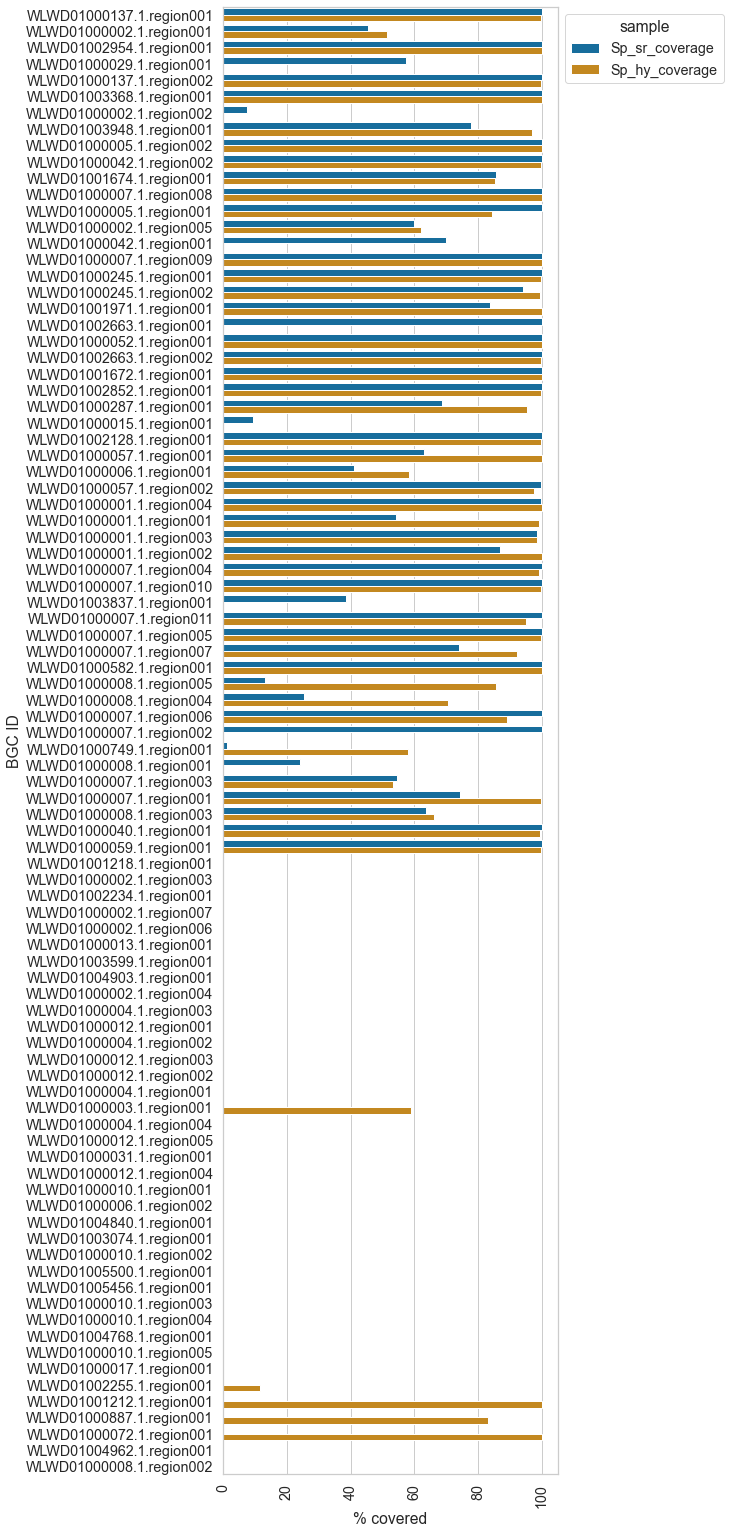

In [28]:
# Make a side-by-side barplot
sb.set_theme(style='whitegrid', font_scale=1.3)
# sb.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(6, 27))
sb.barplot(data=Sp_BGC_mapping_merged_df, y='#rname', x='coverage', hue='sample', orient='h', palette='colorblind', ax=ax)
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel('% covered')
plt.ylabel('BGC ID')

# plt.savefig('/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/Metagenome_v_cosmid_final_thesis_BGC_coverage_plot.pdf', format='pdf', bbox_inches='tight')


In [37]:
"""
NEED TO maker MH_hy_raw_df below first!
"""
# Make class_string as below
MH_hy_raw_df_copy = MH_hy_raw_df.reset_index()
# MH_hy_raw_df_copy['index'] = MH_hy_raw_df_copy['index'].str.replace('|','region00')
MH_hy_index_df = MH_hy_raw_df_copy['index'].str.split('|', expand=True)
MH_hy_index_df[1] = MH_hy_index_df[1].str.zfill(3)
MH_hy_index_df['final_index'] = MH_hy_index_df[0]+'.region'+MH_hy_index_df[1]
MH_hy_raw_df_for_merge = pd.merge(MH_hy_raw_df_copy, MH_hy_index_df, left_index=True, right_index=True)
MH_hy_raw_df_for_merge = MH_hy_raw_df_for_merge.drop(columns=[0,1,'index'])
MH_hy_raw_df_plus_cov = pd.merge(MH_hy_raw_df_for_merge, Sp_BGC_mapping_merged_df, left_on='final_index', right_on='#rname')
MH_hy_raw_df_plus_cov['class_string'] = ['-'.join(map(str, l)) for l in MH_hy_raw_df_plus_cov['class'].apply(lambda x: sorted(x))]
MH_hy_raw_df_plus_cov


,length,class,contig_edge,similarity,final_index,#rname,sample,coverage,class_string
0,20588,[hserlactone],False,0,WLWD01000001.1.region001,WLWD01000001.1.region001,Sp_sr_coverage,54.2355,hserlactone
1,20588,[hserlactone],False,0,WLWD01000001.1.region001,WLWD01000001.1.region001,Sp_hy_coverage,99.1306,hserlactone
2,20768,[terpene],False,0,WLWD01000001.1.region002,WLWD01000001.1.region002,Sp_sr_coverage,86.7826,terpene
3,20768,[terpene],False,0,WLWD01000001.1.region002,WLWD01000001.1.region002,Sp_hy_coverage,99.9133,terpene
4,20022,[RRE-containing],False,0,WLWD01000001.1.region003,WLWD01000001.1.region003,Sp_sr_coverage,98.3368,RRE-containing
...,...,...,...,...,...,...,...,...,...
175,26276,[NRPS],True,0,WLWD01004962.1.region001,WLWD01004962.1.region001,Sp_hy_coverage,0.0000,NRPS
176,21855,[hglE-KS],True,0,WLWD01005456.1.region001,WLWD01005456.1.region001,Sp_sr_coverage,0.0000,hglE-KS
177,21855,[hglE-KS],True,0,WLWD01005456.1.region001,WLWD01005456.1.region001,Sp_hy_coverage,0.0000,hglE-KS
178,13282,[transAT-PKS-like],True,0,WLWD01005500.1.region001,WLWD01005500.1.region001,Sp_sr_coverage,0.0000,transAT-PKS-like


Text(0.5, 0, 'BGC ID')

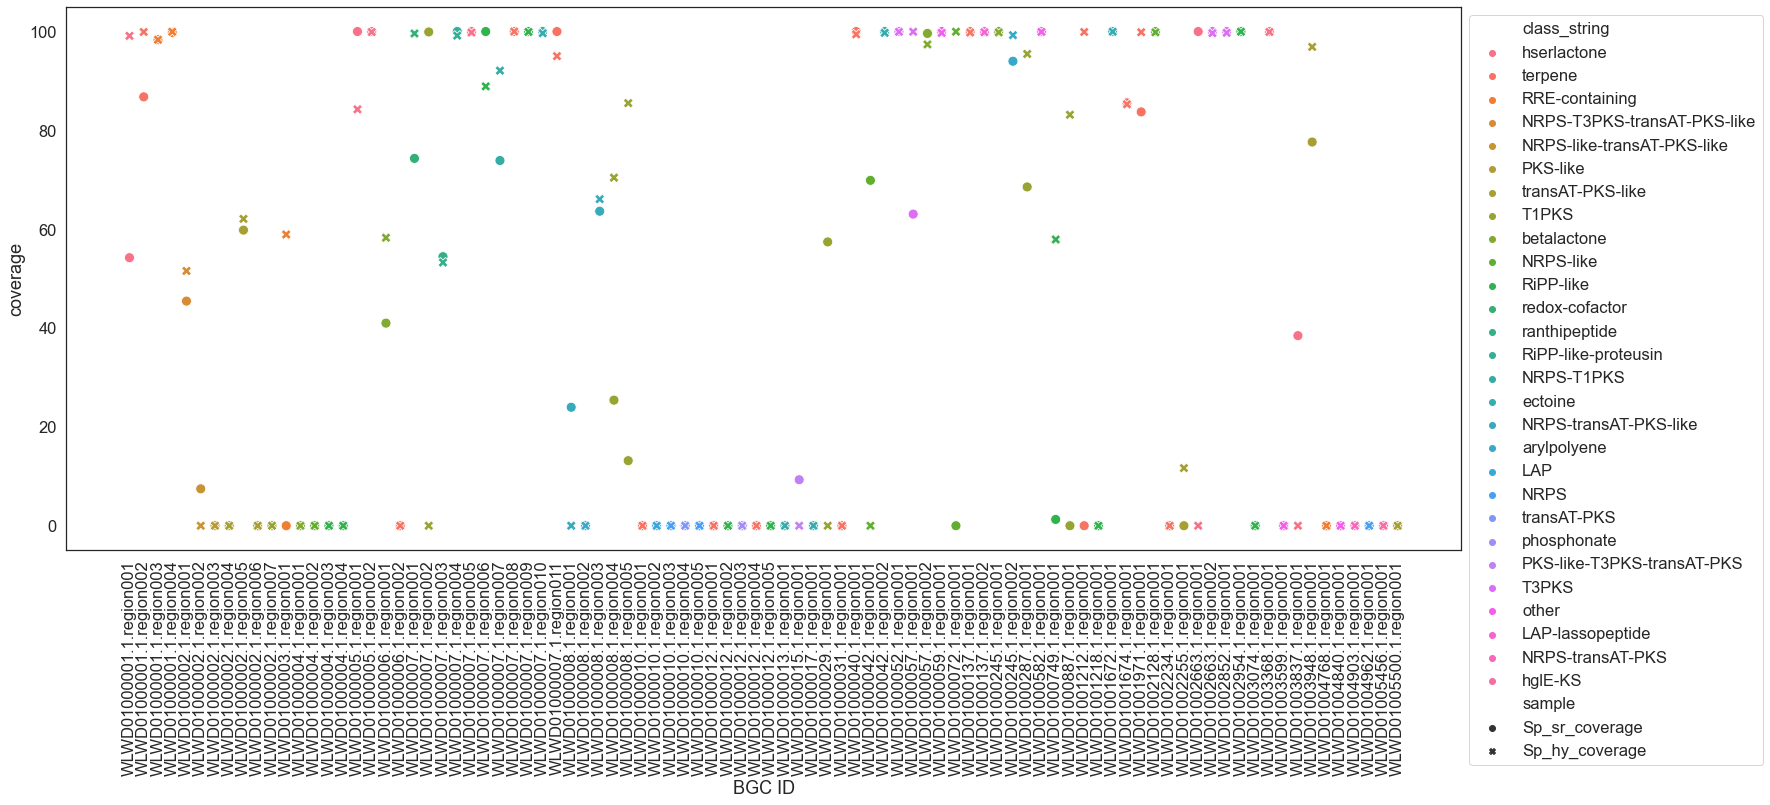

In [38]:
sb.set_theme(style='white', font_scale=1.5)
fig, ax = plt.subplots(figsize=(25,10))
sb.scatterplot(data=MH_hy_raw_df_plus_cov, x="final_index", y="coverage", hue="class_string", style='sample', s=100)
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel('BGC ID')

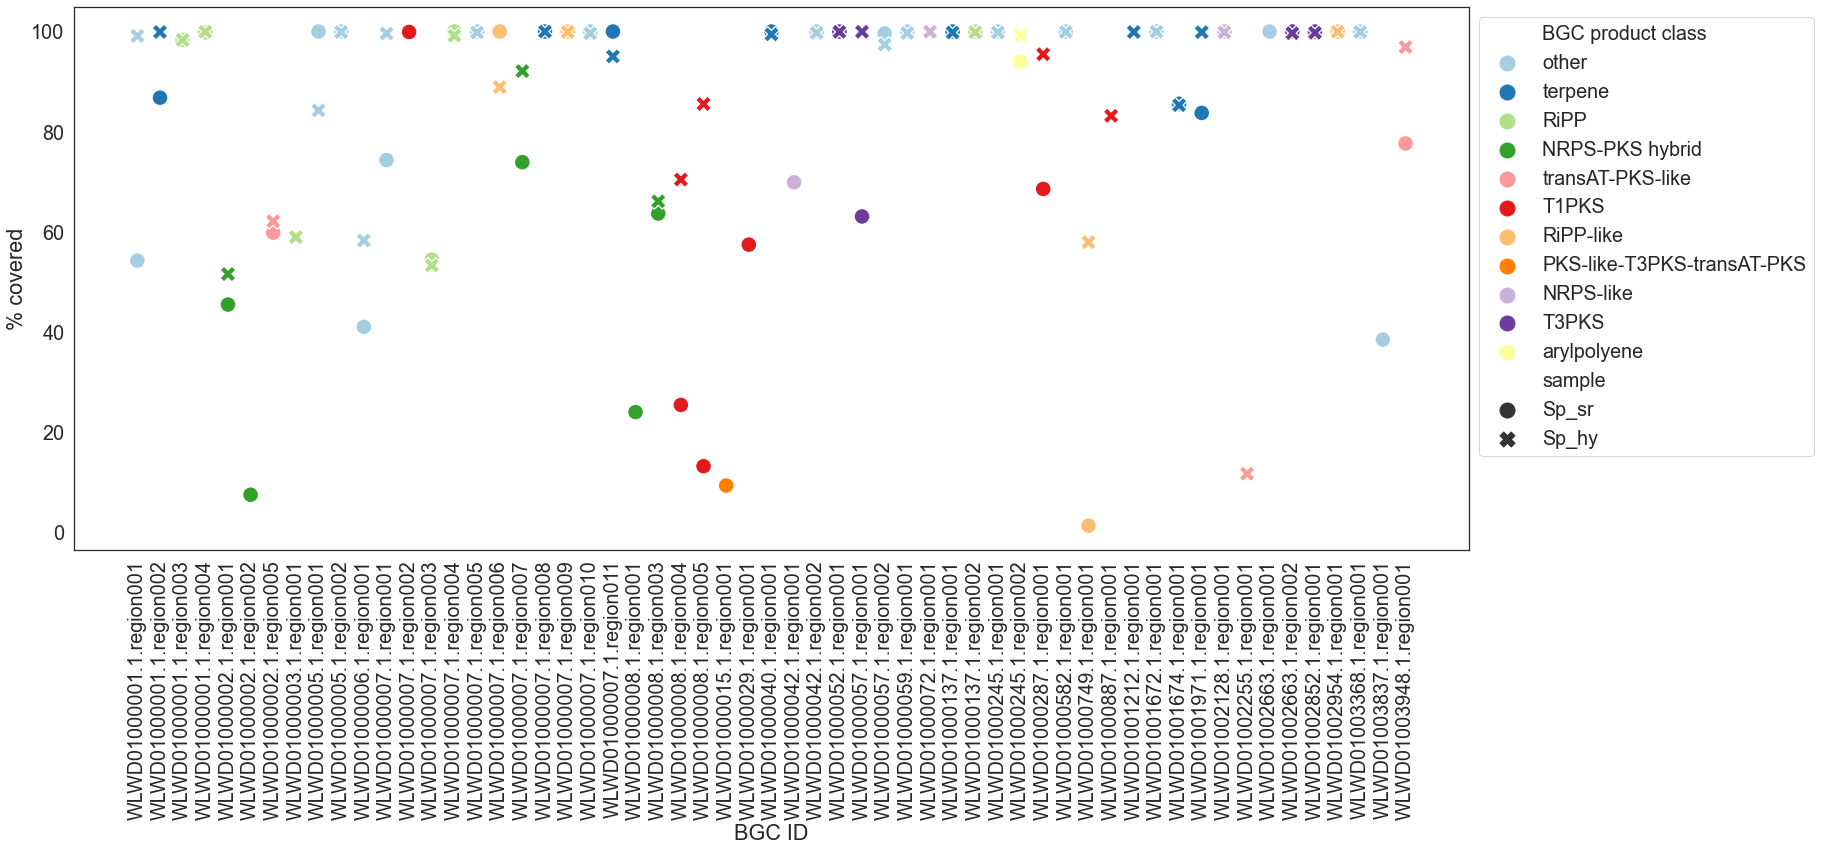

In [39]:
# Make a dataframe with less BGC product classes and plot only those with coverage
MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov.copy()
RiPP_list = ['ranthipeptide','LAP','LAP-lassopeptide','RiPP-like-proteusin','RRE-containing','lassopeptide',
             'linaridin','thiopeptide', 'RRE-containing-lassopeptide']
NRPS_PKS_hybird_list = ['NRPS-like-transAT-PKS-like','NRPS-transAT-PKS','NRPS-transAT-PKS-like',
                       'NRPS-T3PKS-transAT-PKS-like', 'NRPS-T1PKS']
other_list = ['hserlactone','betalactone','redox-cofactor','ectoine','other','phosphonate']

MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov_copy.replace(to_replace=RiPP_list, value='RiPP')
MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov_copy.replace(to_replace=NRPS_PKS_hybird_list, value='NRPS-PKS hybrid')
MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov_copy.replace(to_replace=other_list, value='other')
MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov_copy.replace(to_replace='Sp_sr_coverage', value='Sp_sr')
MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov_copy.replace(to_replace='Sp_hy_coverage', value='Sp_hy')
MH_hy_raw_df_plus_cov_copy = MH_hy_raw_df_plus_cov_copy.rename(columns={'class_string':'BGC product class'})

sb.set_theme(style='white', font_scale=1.8)
fig, ax = plt.subplots(figsize=(25,10))
sb.scatterplot(data=MH_hy_raw_df_plus_cov_copy[MH_hy_raw_df_plus_cov_copy['coverage'] > 0], 
               x="final_index", y="coverage", hue="BGC product class", style='sample', s=250, palette='Paired')
# sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel('BGC ID')
plt.ylabel('% covered')
plt.legend(markerscale=2.5, bbox_to_anchor=(1, 1))

# plt.savefig('/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/Metagenome_v_cosmid_final_thesis_BGC_coverage_scatterplot.pdf', format='pdf', bbox_inches='tight')


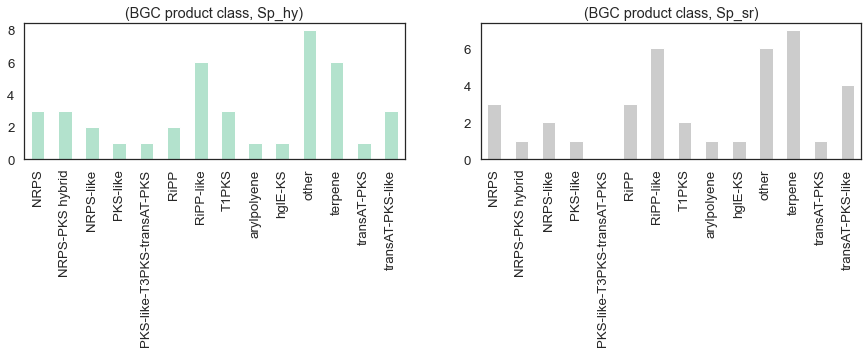

In [40]:
df_to_plot = MH_hy_raw_df_plus_cov_copy[MH_hy_raw_df_plus_cov_copy['coverage'] == 0].groupby('sample')['BGC product class'].value_counts().to_frame().unstack('sample')

sb.set_theme(style='white', font_scale=1.2)
# df_to_plot.plot.bar(subplots=True, figsize=(10,4), layout=(1,2), stacked=True, legend=False, sharey=True)
axs = df_to_plot.plot.bar(subplots=True, figsize=(15,2.5), layout=(1,2), stacked=True, legend=False,
                         colormap='Pastel2')
    
ax_flat = axs.flatten()
for ax in ax_flat:
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)
    
# plt.savefig('/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/Metagenome_v_cosmid_final_thesis_BGC_coverage_missed_plot.pdf', format='pdf', bbox_inches='tight')


In [41]:
# Total number of BGCs from MH_hy dataset (n=90) accounted for by Sp_sr and Sp_hy
MH_hy_raw_df_plus_cov_copy[MH_hy_raw_df_plus_cov_copy['coverage'] > 0]['final_index'].nunique()

57

# Basic BGC stats based on GBK and Json files

In [30]:
# Only neede if above code isn't run
gbk_file_list = open("/Users/vincentn/Downloads/BiG-SCAPE_unique_BGCs_alt.txt", "r").read().split()
print(len(gbk_file_list))


1168


In [31]:
# Seems overcomplicated but this matches the names of deduplicated gbk files to the json file
# Needs to be done since antiSMASH was run on each library well assembly separately
Sp_sr_json_dir = "/Users/vincentn/Downloads/all_antiSMASH_6_1_json_files/"

# Make a dictionary with json file as key, so that it only gets opened once
count = 0
json_dict = {}
for i in os.listdir(Sp_sr_json_dir):
    pool = i.split("_")[0]
    for file in gbk_file_list:
        match = file.split("_")[2]
        BGC = "c"+file.split("_c")[1].split("...")[0]
        # Note that this assumed the region is a single digit
        region = file.split("region00")[1].split(".gbk")[0]
        if pool == match:
            #print(pool,match,BGC,region)
            tmp_list = [BGC,region]
            if i in json_dict:
                json_dict[i].append(tmp_list)
            else:
                json_dict[i] = [tmp_list]
            count += 1

print(count)

json_out_count = 0
summary_dict = {}
for key in json_dict:
    with open(Sp_sr_json_dir+"/"+key) as json_file:
        data = json.load(json_file)
        index=len(data['records'])
        for BGC in json_dict[key]: 
            for j in range(index):
                if BGC[0] in data['records'][j]['id']:
                    for k in data['records'][j]['features']:
                        # don't need to check region really as all are region001
                        if k['type'] == 'region'and k['qualifiers']['region_number'][0] == BGC[1]:
                            json_out_count += 1
                            # Not the complete gbk file name but should help later on
                            dict_key = "Sp_sr_"+key.split("L6_1")[0]+BGC[0]
                            summary_dict[dict_key] = []
                            location=re.findall(r"\d+\.?\d*", k['location'])
                            bgclen=abs(int(location[0])-int(location[1]))
                            summary_dict[dict_key].append(bgclen)
                            summary_dict[dict_key].append(k['qualifiers']['product'])
                            summary_dict[dict_key].append(k['qualifiers']["contig_edge"][0])
                            for m in data['records'][j]['modules']['antismash.modules.clusterblast']['knowncluster']['results']:
                                if int(m['region_number']) == int(region):
                                    rank=m['ranking']
                                    if len(rank) ==0:
                                        summary_dict[dict_key].append(0)
                                    else:
                                        genes=len(m['ranking'][0][0]['tags'])
                                        temp_l1=[]
                                        for item in m['ranking'][0][1]['pairings']:
                                            temp_l1.append(item[2]['name'])
                                        temp_l2 = list(set(temp_l1))
                                        similarity=int(100*len(temp_l2)/genes)
                                        summary_dict[dict_key].append(similarity)
    
Sp_sr_raw_df = pd.DataFrame.from_dict(summary_dict, orient='index',columns=['length', 'class', 'contig_edge', 'similarity'])                    

print(json_out_count)

1168
1168


In [32]:
Sp_sr_raw_df.head(5)

,length,class,contig_edge,similarity
Sp_sr_SpC-E11_c00294_NODE_29,10957,[other],True,0
Sp_sr_SpC-E11_c00152_NODE_15,17326,[terpene],True,7
Sp_sr_SpC-E11_c00118_NODE_11,25608,[T1PKS],True,0
Sp_sr_SpC-E11_c00227_NODE_22,14505,[betalactone],True,0
Sp_sr_SpC-E11_c00171_NODE_17,18540,"[RiPP-like, proteusin]",True,0


In [33]:
# Single JSON files for the other assemblies
json_Sp_hy = "/Users/vincentn/Downloads/Sp_nano_1kb_alt3_antiSMASH_6_1_gecco_180622/antiSMASH_6_output/final_polished_Sp_nano_1_62kb.json"
json_MH_sr = "/Users/vincentn/Downloads/MHpat150_antiSMASH_6_1_gecco_280522/antiSMASH_6_output/contigs.json"
json_MH_hy = "/Users/vincentn/Downloads/MH_pat_all_antiSMASH_6_1_gecco_280522/antiSMASH_6_output/GCA_012263305.1_ASM1226330v1_genomic.json"


In [34]:
def raw_df(data):
    summary_dict={}
    for j in range(index):
        if 'antismash.modules.clusterblast'in data['records'][j]['modules'].keys():
            for k in data['records'][j]['features']:
                if k['type'] == 'region':
                    node = data['records'][j]['id']
                    region = k['qualifiers']['region_number'][0]                    
                    dict_key = str(node) + '|' + str(region)
                    summary_dict[dict_key] = []
                    location=re.findall(r"\d+\.?\d*", k['location'])
                    bgclen=abs(int(location[0])-int(location[1]))
                    summary_dict[dict_key].append(bgclen)
                    summary_dict[dict_key].append(k['qualifiers']['product'])
                    summary_dict[dict_key].append(k['qualifiers']["contig_edge"][0])
                    for m in data['records'][j]['modules']['antismash.modules.clusterblast']['knowncluster']['results']:
                        if int(m['region_number']) == int(region):
                            rank=m['ranking']
                            if len(rank) ==0:
                                summary_dict[dict_key].append(0)
                            else:
                                genes=len(m['ranking'][0][0]['tags'])
                                temp_l1=[]
                                for item in m['ranking'][0][1]['pairings']:
                                    temp_l1.append(item[2]['name'])
                                temp_l2 = list(set(temp_l1))
                                similarity=int(100*len(temp_l2)/genes)
                                summary_dict[dict_key].append(similarity)
    
    raw_df = pd.DataFrame.from_dict(summary_dict, orient='index',columns=['length', 'class', 'contig_edge', 'similarity'])
    
    return (raw_df)

In [35]:
with open(json_Sp_hy) as json_file:
    data = json.load(json_file)
    index=len(data['records'])
Sp_hy_raw_df = raw_df(data)

with open(json_MH_sr) as json_file:
    data = json.load(json_file)
    index=len(data['records'])
MH_sr_raw_df = raw_df(data)

with open(json_MH_hy) as json_file:
    data = json.load(json_file)
    index=len(data['records'])
MH_hy_raw_df = raw_df(data)

In [36]:
print("Sp_sr")
print("Has "+str(len(Sp_sr_raw_df))+" BGCs")
print(Sp_sr_raw_df[['length','similarity']].mean())
print(Sp_sr_raw_df['contig_edge'].value_counts())
print("Sp_hy")
print("Has "+str(len(Sp_hy_raw_df))+" BGCs")
print(Sp_hy_raw_df[['length','similarity']].mean())
print(Sp_hy_raw_df['contig_edge'].value_counts())
print("MH_sr")
print("Has "+str(len(MH_sr_raw_df))+" BGCs")
print(MH_sr_raw_df[['length','similarity']].mean())
print(MH_sr_raw_df['contig_edge'].value_counts())
print("MH_hy")
print("Has "+str(len(MH_hy_raw_df))+" BGCs")
print(MH_hy_raw_df[['length','similarity']].mean())
print(MH_hy_raw_df['contig_edge'].value_counts())

Sp_sr
Has 1168 BGCs
length        20454.771404
similarity        8.207192
dtype: float64
True     893
False    275
Name: contig_edge, dtype: int64
Sp_hy
Has 88 BGCs
length        26668.306818
similarity        5.909091
dtype: float64
False    50
True     38
Name: contig_edge, dtype: int64
MH_sr
Has 110 BGCs
length        20984.900000
similarity        6.518182
dtype: float64
True     61
False    49
Name: contig_edge, dtype: int64
MH_hy
Has 90 BGCs
length        31322.400000
similarity        6.755556
dtype: float64
False    74
True     16
Name: contig_edge, dtype: int64


In [42]:
# Need to sort BGC types alphabetically to avoid double-ups!
# Use class_string from here on!
print('Sp_sr')
print(len(set(Sp_sr_raw_df['class'].astype(str).tolist())))
print(len(set(Sp_sr_raw_df['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print(len(set(Sp_sr_raw_df[Sp_sr_raw_df['contig_edge'] == 'False']['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print('Sp_hy')
print(len(set(Sp_hy_raw_df['class'].astype(str).tolist())))
print(len(set(Sp_hy_raw_df['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print(len(set(Sp_hy_raw_df[Sp_hy_raw_df['contig_edge'] == 'False']['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print('MH_sr')
print(len(set(MH_sr_raw_df['class'].astype(str).tolist())))
print(len(set(MH_sr_raw_df['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print(len(set(MH_sr_raw_df[MH_sr_raw_df['contig_edge'] == 'False']['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print('MH_hy')
print(len(set(MH_hy_raw_df['class'].astype(str).tolist())))
print(len(set(MH_hy_raw_df['class'].apply(lambda x: sorted(x)).astype(str).tolist())))
print(len(set(MH_hy_raw_df[MH_hy_raw_df['contig_edge'] == 'False']['class'].apply(lambda x: sorted(x)).astype(str).tolist())))

Sp_sr_raw_df_tmp = Sp_sr_raw_df.copy()
Sp_sr_raw_df_tmp['class_string'] = ['-'.join(map(str, l)) for l in Sp_sr_raw_df_tmp['class'].apply(lambda x: sorted(x))]
Sp_hy_raw_df_tmp = Sp_hy_raw_df.copy()
Sp_hy_raw_df_tmp['class_string'] = ['-'.join(map(str, l)) for l in Sp_hy_raw_df_tmp['class'].apply(lambda x: sorted(x))]
MH_sr_raw_df_tmp = MH_sr_raw_df.copy()
MH_sr_raw_df_tmp['class_string'] = ['-'.join(map(str, l)) for l in MH_sr_raw_df_tmp['class'].apply(lambda x: sorted(x))]
MH_hy_raw_df_tmp = MH_hy_raw_df.copy()
MH_hy_raw_df_tmp['class_string'] = ['-'.join(map(str, l)) for l in MH_hy_raw_df_tmp['class'].apply(lambda x: sorted(x))]


Sp_sr
42
33
10
Sp_hy
28
27
20
MH_sr
30
27
17
MH_hy
28
28
26


In [43]:
# What BGC classes are unique to what sequencing approach?
Sp_sr_raw_df_BGC_class_list = Sp_sr_raw_df_tmp['class_string'].unique().tolist()
Sp_hy_raw_df_BGC_class_list = Sp_hy_raw_df_tmp['class_string'].unique().tolist()
MH_sr_raw_df_BGC_class_list = MH_sr_raw_df_tmp['class_string'].unique().tolist()
MH_hy_raw_df_BGC_class_list = MH_hy_raw_df_tmp['class_string'].unique().tolist()

for i in Sp_sr_raw_df_BGC_class_list:
    if i not in (Sp_hy_raw_df_BGC_class_list+MH_sr_raw_df_BGC_class_list+MH_hy_raw_df_BGC_class_list):
        print(i+' is unique to Sp_sr')
        
for i in Sp_hy_raw_df_BGC_class_list:
    if i not in (Sp_sr_raw_df_BGC_class_list+MH_sr_raw_df_BGC_class_list+MH_hy_raw_df_BGC_class_list):
        print(i+' is unique to Sp_hy')
        
for i in MH_sr_raw_df_BGC_class_list:
    if i not in (Sp_sr_raw_df_BGC_class_list+Sp_hy_raw_df_BGC_class_list+MH_hy_raw_df_BGC_class_list):
        print(i+' is unique to MH_sr')

for i in MH_hy_raw_df_BGC_class_list:
    if i not in (Sp_sr_raw_df_BGC_class_list+Sp_hy_raw_df_BGC_class_list+MH_sr_raw_df_BGC_class_list):
        print(i+' is unique to MH_hy')
        

RRE-containing-proteusin is unique to Sp_sr
NRPS-NRPS-like-T1PKS is unique to Sp_sr
lassopeptide is unique to Sp_sr
proteusin is unique to Sp_sr
thiopeptide is unique to Sp_hy
T3PKS-transAT-PKS is unique to MH_sr
NRPS-T3PKS-transAT-PKS-like is unique to MH_hy
PKS-like-T3PKS-transAT-PKS is unique to MH_hy


In [44]:
# Assign sample name and merge dataframes
# Final dataframe should be 1,456 BGCs
Sp_sr_raw_df_tmp = Sp_sr_raw_df_tmp.assign(sample='Sp_sr')
Sp_hy_raw_df_tmp = Sp_hy_raw_df_tmp.assign(sample='Sp_hy')
MH_sr_raw_df_tmp = MH_sr_raw_df_tmp.assign(sample='MH_sr')
MH_hy_raw_df_tmp = MH_hy_raw_df_tmp.assign(sample='MH_hy')

BGC_summary_df = pd.concat([Sp_sr_raw_df_tmp,Sp_hy_raw_df_tmp,MH_sr_raw_df_tmp,MH_hy_raw_df_tmp],
                          axis=0)
BGC_summary_df


,length,class,contig_edge,similarity,class_string,sample
Sp_sr_SpC-E11_c00294_NODE_29,10957,[other],True,0,other,Sp_sr
Sp_sr_SpC-E11_c00152_NODE_15,17326,[terpene],True,7,terpene,Sp_sr
Sp_sr_SpC-E11_c00118_NODE_11,25608,[T1PKS],True,0,T1PKS,Sp_sr
Sp_sr_SpC-E11_c00227_NODE_22,14505,[betalactone],True,0,betalactone,Sp_sr
Sp_sr_SpC-E11_c00171_NODE_17,18540,"[RiPP-like, proteusin]",True,0,RiPP-like-proteusin,Sp_sr
...,...,...,...,...,...,...
WLWD01004840.1|1,22973,[other],True,0,other,MH_hy
WLWD01004903.1|1,43368,"[transAT-PKS, NRPS]",True,28,NRPS-transAT-PKS,MH_hy
WLWD01004962.1|1,26276,[NRPS],True,0,NRPS,MH_hy
WLWD01005456.1|1,21855,[hglE-KS],True,0,hglE-KS,MH_hy


In [45]:
# Inspect BGC counts
BGC_summary_df_plot_df = BGC_summary_df.groupby(['class_string','sample']).size().unstack(fill_value=0)
BGC_summary_df_plot_df


sample,MH_hy,MH_sr,Sp_hy,Sp_sr
class_string,,,,
LAP,1,1,0,0
LAP-lassopeptide,1,1,1,10
NRPS,3,4,3,23
NRPS-NRPS-like,0,0,2,3
NRPS-NRPS-like-T1PKS,0,0,0,3
NRPS-T1PKS,1,0,1,19
NRPS-T3PKS-transAT-PKS-like,1,0,0,0
NRPS-like,4,4,4,49
NRPS-like-T1PKS,0,2,0,2


In [46]:
# Sanity check the BGC numbers add up as expected
BGC_summary_df_plot_df.sum(axis=0)

sample
MH_hy      90
MH_sr     110
Sp_hy      88
Sp_sr    1168
dtype: int64

Text(0.5, 15.361874999999998, '')

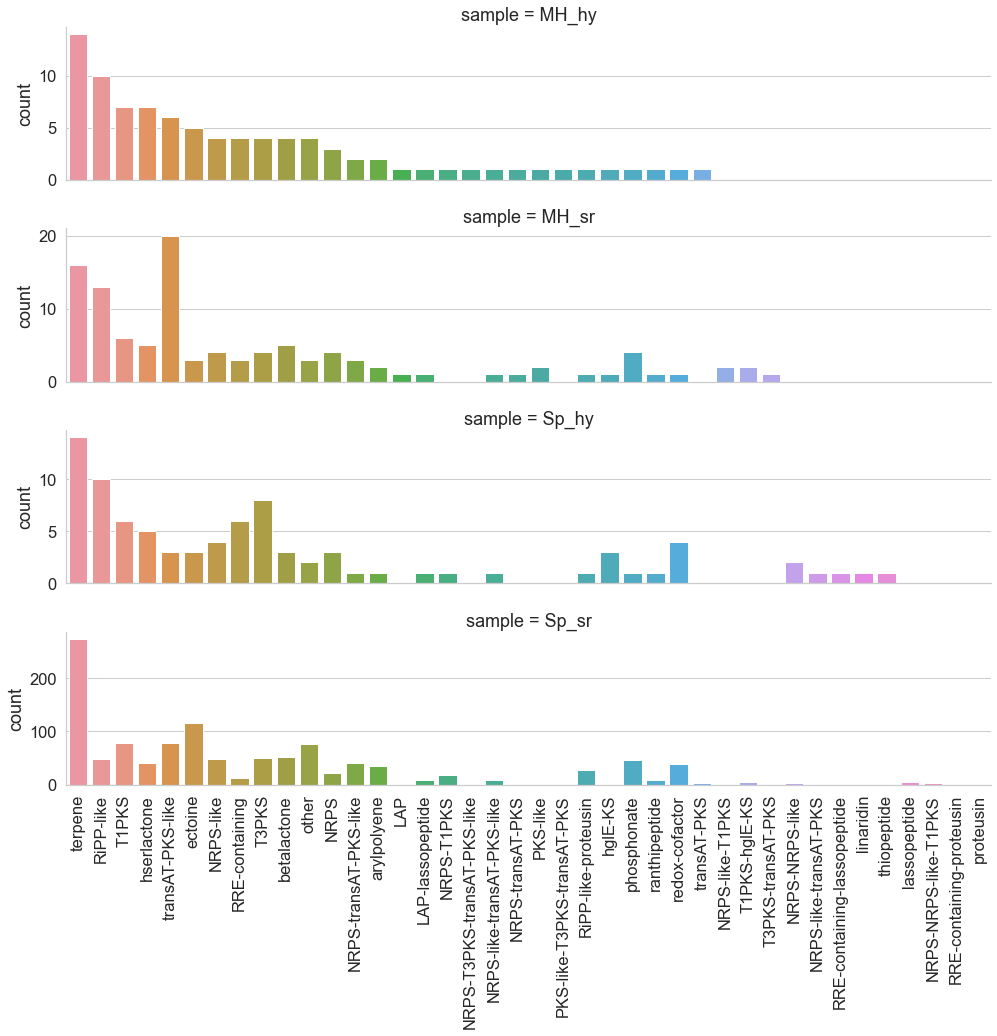

In [47]:
# Summarise BGC count by sample
BGC_summary_catplot_df = BGC_summary_df.groupby('sample')['class_string'].value_counts().to_frame().rename(columns={'class_string':'count'}).reset_index()

sb.set_theme(style='whitegrid', font_scale=1.5)
sb.catplot(data=BGC_summary_catplot_df, x='class_string', y='count', col="sample", col_wrap=1,
    sharey=False, kind="bar", height=3, aspect=5)
plt.xticks(rotation=90)
plt.xlabel(None)
# plt.savefig("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/Metagenome_v_cosmid_final_thesis_BGC_by_sample_plot.pdf", format='pdf', bbox_inches='tight')



Text(0.5, 15.361874999999998, '')

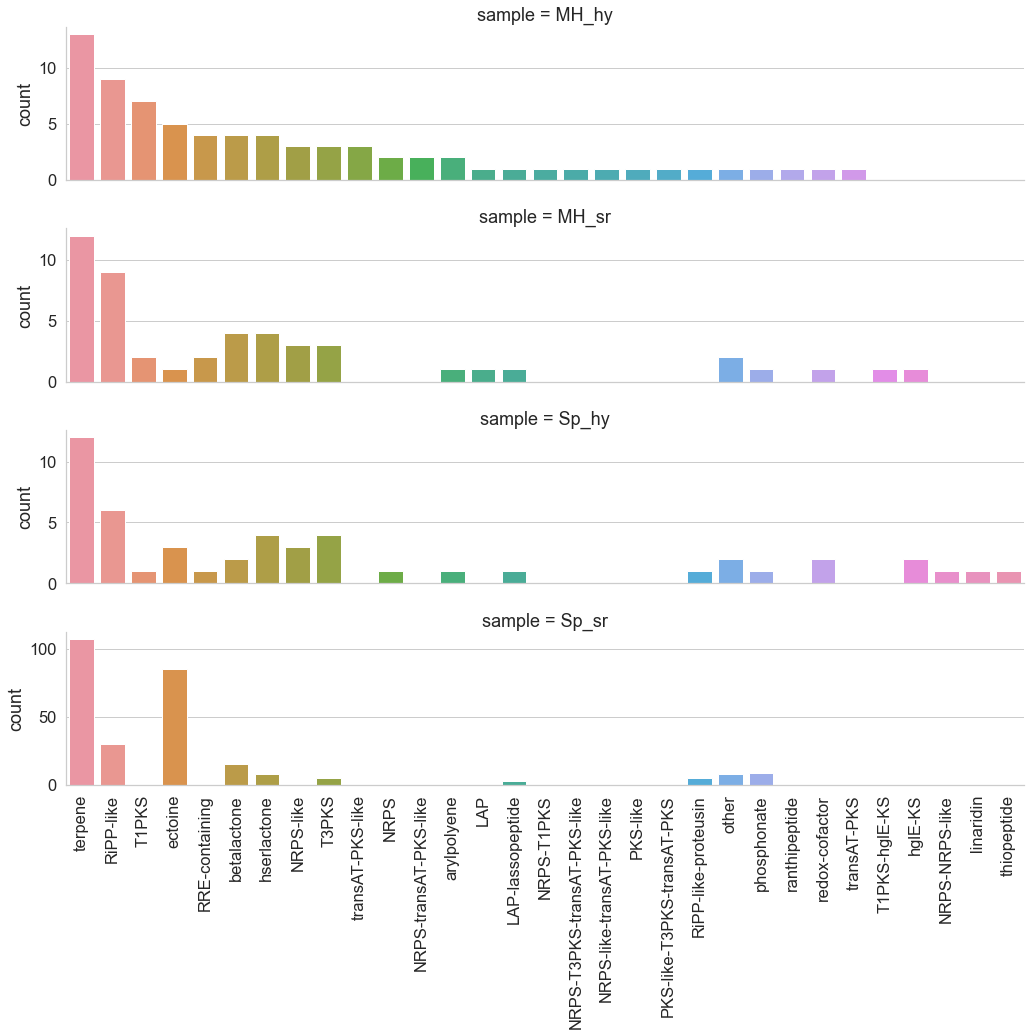

In [48]:
# Summarise complete BGC count by sample
BGC_summary_catplot_df = BGC_summary_df[BGC_summary_df['contig_edge'] == 'False'].groupby('sample')['class_string'].value_counts().to_frame().rename(columns={'class_string':'count'}).reset_index()

sb.set_theme(style='whitegrid', font_scale=1.5)
sb.catplot(data=BGC_summary_catplot_df, x='class_string', y='count', col="sample", col_wrap=1,
    sharey=False, kind="bar", height=3, aspect=5)
plt.xticks(rotation=90)
plt.xlabel(None)
# plt.savefig("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/Metagenome_v_cosmid_final_thesis_complete_BGC_by_sample_plot.pdf", format='pdf', bbox_inches='tight')


## SMCOGs

In [55]:
# Input files
input_file_1 = "/Users/vincentn/Downloads/Sp_nano_1kb_alt3_antiSMASH_6_1_gecco_180622/antiSMASH_6_output/final_polished_Sp_nano_1_62kb.gbk"
input_file_2 = "/Users/vincentn/Downloads/MHpat150_antiSMASH_6_1_gecco_280522/antiSMASH_6_output/contigs.gbk"
input_file_3 = "/Users/vincentn/Downloads/MH_pat_all_antiSMASH_6_1_gecco_280522/antiSMASH_6_output/GCA_012263305.1_ASM1226330v1_genomic.gbk"

In [53]:
# Include the individual cosmid assembly antiSMASH outputs
SMCOGs_Sp_sr = []
for i in os.listdir("/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/input/Sp_sr/"):
    if i.endswith(".gbk"):
        for record in SeqIO.parse("/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/input/Sp_sr/"+i, "genbank"):
            for feature in record.features:
                try:
                    # ensure the feature is actually an SMCOG
                    if feature.type == "CDS" and "SMCOG" in str(feature.qualifiers["gene_functions"]):
                        SMCOG = str(feature.qualifiers["gene_functions"]).split("(smcogs) ")[1].split("(Score")[0]
                        if SMCOG not in SMCOGs_Sp_sr:
                            SMCOGs_Sp_sr.append(SMCOG)
                except KeyError:
                    continue
print(len(SMCOGs_Sp_sr))

160


In [51]:
def IdentifyUniqueSMCOGs(input_list, nested_list):
    """
    Takes in a list, the items of which are compared to a nested list and the number
    of unique items in the input list is returned
    """
    comp_list = [x for x in nested_list if x != input_list]
    unique_comp_list = []
    output_list = []
    for k in comp_list:
        for l in k:
            if l not in unique_comp_list:
                unique_comp_list.append(l)
    for j in input_list:
        if j not in unique_comp_list:
            output_list.append(j)
    
    return output_list

In [52]:
def MakeUniqSMCOGlist(input_file):
    """
    Takes in an assembly.gbk file from the antiSMASH output and returns a list of unique SMCOGs
    predicted from that assembly
    """
    unique_smcogs = []
    for record in SeqIO.parse(input_file, "genbank"):
        for feature in record.features:
            try:
                if feature.type == "CDS" and "SMCOG" in str(feature.qualifiers["gene_functions"]):
                    SMCOG = str(feature.qualifiers["gene_functions"]).split("(smcogs) ")[1].split("(Score")[0]
                    if SMCOG not in unique_smcogs:
                        unique_smcogs.append(SMCOG)
            except KeyError:
                continue
    
    return unique_smcogs

In [56]:
unique_SMCOGs_Sp_hy = MakeUniqSMCOGlist(input_file_1)
unique_SMCOGs_MH_sr = MakeUniqSMCOGlist(input_file_2)
unique_SMCOGs_MH_hy = MakeUniqSMCOGlist(input_file_3)

In [57]:
print(len(SMCOGs_Sp_sr))
print(len(unique_SMCOGs_Sp_hy))
print(len(unique_SMCOGs_MH_sr))
print(len(unique_SMCOGs_MH_hy))

160
179
170
184


In [58]:
all_unique_SMCOGs_all = []
SMCOGs_list_all = [SMCOGs_Sp_sr,unique_SMCOGs_Sp_hy,unique_SMCOGs_MH_sr,unique_SMCOGs_MH_hy]
for i in SMCOGs_list_all:
    for j in i:
        if j not in all_unique_SMCOGs_all:
            all_unique_SMCOGs_all.append(j)
print("There are "+str(len(all_unique_SMCOGs_all))+" unique SMCOGs across all assemblies")

There are 223 unique SMCOGs across all assemblies


In [59]:
diff_count_1 = CompareToNestedList(SMCOGs_Sp_sr, SMCOGs_list_all)
print("There are "+str(diff_count_1)+" SMCOGs unique to Sp_sr")
diff_count_2 = CompareToNestedList(unique_SMCOGs_Sp_hy, SMCOGs_list_all)
print("There are "+str(diff_count_2)+" SMCOGs unique to Sp_hy")
diff_count_3 = CompareToNestedList(unique_SMCOGs_MH_sr, SMCOGs_list_all)
print("There are "+str(diff_count_3)+" SMCOGs unique to MH_sr")
diff_count_4 = CompareToNestedList(unique_SMCOGs_MH_hy, SMCOGs_list_all)
print("There are "+str(diff_count_4)+" SMCOGs unique to MH_hy")

There are [] SMCOGs unique to Sp_sr
There are [] SMCOGs unique to Sp_hy
There are [] SMCOGs unique to MH_sr
There are [] SMCOGs unique to MH_hy


In [60]:
print("Sp_sr:"+"\n"+str(IdentifyUniqueSMCOGs(SMCOGs_Sp_sr, SMCOGs_list_all)))
print("Sp_hy:"+"\n"+str(IdentifyUniqueSMCOGs(unique_SMCOGs_Sp_hy, SMCOGs_list_all)))
print("MH_sr:"+"\n"+str(IdentifyUniqueSMCOGs(unique_SMCOGs_MH_sr, SMCOGs_list_all)))
print("MH_hy:"+"\n"+str(IdentifyUniqueSMCOGs(unique_SMCOGs_MH_hy, SMCOGs_list_all)))

Sp_sr:
['SMCOG1178:cobalamin synthesis protein/P47K family protein ', 'SMCOG1273:hypothetical protein ', 'SMCOG1041:transcriptional regulator, SARP family ', 'SMCOG1202:major facilitator transporter ', 'SMCOG1046:Dioxygenase TauD/TfdA ']
Sp_hy:
['SMCOG1268:mandelate racemase/muconate lactonizing enzyme ', 'SMCOG1232:hypothetical protein ', 'SMCOG1181:dehydrogenase ', 'SMCOG1211:hypothetical protein ', 'SMCOG1185:carbon starvation protein A ', 'SMCOG1033:iron compound ABC transporter, periplasmic ', 'SMCOG1011:transport system permease protein ', 'SMCOG1254:ferric enterobactin transport protein FepE ', 'SMCOG1247:acetylornithine deacetylase ', 'SMCOG1207:inositol monophosphatase ', 'SMCOG1169:sugar transport protein ', 'SMCOG1275:peptide deformylase ', 'SMCOG1280:thiamine-phosphate pyrophosphorylase ', 'SMCOG1255:cold-shock DNA-binding domain protein ', 'SMCOG1120:AsnC family transcriptional regulator ', 'SMCOG1136:GntR family transcriptional regulator ']
MH_sr:
['SMCOG1171:transcriptio

# BiG-SCAPE

## alt3

In [62]:
bigscape_alt3_dir = "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/network_files/2022-06-20_09-34-41_hybrids_glocal"
os.listdir(bigscape_alt3_dir)

['NRPS',
 'PKSI',
 'PKS-NRP_Hybrids',
 'Others',
 'Network_Annotations_Full.tsv',
 'PKSother',
 'Terpene',
 'RiPPs']

In [63]:
# Make list of clustering files for each cutoff used
point1_file_list =[]
point3_file_list =[]
point5_file_list =[]

for root, subdirs, files in os.walk(bigscape_alt3_dir):
    for file in files:
        if "clustering_c0.10" in file:
            point1_file_list.append(os.path.join(root,file))
        if "clustering_c0.30" in file:
            point3_file_list.append(os.path.join(root,file))
        if "clustering_c0.50" in file:
            point5_file_list.append(os.path.join(root,file))

In [64]:
def MakeCutoffGCFAssemblySummary(input_file_list):
    # Note that the dataframe doesn't contain the MiBIG GCFs and will thus be less than the unique
    # GCF IDs found by simply counting from the clustering files

    # Read in the first dataframe in the cutoff list to set up df structure
    cutoff_GCF_df = pd.read_csv(input_file_list[0], sep="\t")
    # make a new column containing the assembly (based on BGC name)
    assembly_df = cutoff_GCF_df["#BGC Name"].str.split("_", n=2, expand=True)
    assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
    assembly_series = assembly_df["assembly"]
    cutoff_GCF_df = cutoff_GCF_df.join(assembly_series)
    # Had to insert this to remove MiBIG BGCs
    cutoff_GCF_df = cutoff_GCF_df.dropna()

    # Read in the remaining dataframes in the cutoff list and concatenate
    for input_file in input_file_list[1:]:
        tmp_df = pd.read_csv(input_file, sep='\t')
        # make a new column containing the assembly (based on BGC name)
        assembly_df = tmp_df["#BGC Name"].str.split("_", n=2, expand=True)
        assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
        assembly_series = assembly_df["assembly"]
        tmp_df = tmp_df.join(assembly_series)
        # Had to insert this to remove MiBIG BGCs
        tmp_df = tmp_df.dropna()
        cutoff_GCF_df = pd.concat([cutoff_GCF_df, tmp_df])

    # Remove duplicate BGC entries
    cutoff_GCF_df = cutoff_GCF_df.drop_duplicates(subset="#BGC Name")
    # Make a list of the group members and only keep unique assemblies
    # NOTE that this currenlty includes singletons; may want to filter these out for comparison
    # NOTE also that GCFs in multiple networks will be the same and from the same assemblies
    # ,thus no need to dereplicate before making these assembly lists/sets
    cutoff_GCF_lists = cutoff_GCF_df.groupby("Family Number")["assembly"].apply(list)
    cutoff_GCF_lists_df = pd.DataFrame(cutoff_GCF_lists)
    cutoff_GCF_lists_df["assembly"] = cutoff_GCF_lists_df["assembly"].apply(lambda x: sorted(set(x)))

    return cutoff_GCF_lists_df["assembly"].value_counts().to_frame()



In [65]:
def MakeCutoffGCFAssemblySummaryExclSing(input_file_list):
    # Note that the dataframe doesn't contain the MiBIG GCFs and will thus be less than the unique
    # GCF IDs found by simply counting from the clustering files

    # Read in the first dataframe in the cutoff list to set up df structure
    cutoff_GCF_df = pd.read_csv(input_file_list[0], sep="\t")
    # make a new column containing the assembly (based on BGC name)
    assembly_df = cutoff_GCF_df["#BGC Name"].str.split("_", n=2, expand=True)
    assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
    assembly_series = assembly_df["assembly"]
    cutoff_GCF_df = cutoff_GCF_df.join(assembly_series)
    # Had to insert this to remove MiBIG BGCs
    cutoff_GCF_df = cutoff_GCF_df.dropna()

    # Read in the remaining dataframes in the cutoff list and concatenate
    for input_file in input_file_list[1:]:
        tmp_df = pd.read_csv(input_file, sep='\t')
        # make a new column containing the assembly (based on BGC name)
        assembly_df = tmp_df["#BGC Name"].str.split("_", n=2, expand=True)
        assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
        assembly_series = assembly_df["assembly"]
        tmp_df = tmp_df.join(assembly_series)
        # Had to insert this to remove MiBIG BGCs
        tmp_df = tmp_df.dropna()
        cutoff_GCF_df = pd.concat([cutoff_GCF_df, tmp_df])
    
    # Remove duplicate BGC entries
    cutoff_GCF_df = cutoff_GCF_df.drop_duplicates(subset="#BGC Name")
    # Filter out singletons
    cutoff_GCF_df = cutoff_GCF_df.groupby("Family Number").filter(lambda x: len(x) > 1)
    # Make a list of the group members and only keep unique assemblies
    # NOTE that this currenlty includes singletons; may want to filter these out for comparison
    # NOTE also that GCFs in multiple networks will be the same and from the same assemblies
    # ,thus no need to dereplicate before making these assembly lists/sets
    cutoff_GCF_lists = cutoff_GCF_df.groupby("Family Number")["assembly"].apply(list)
    cutoff_GCF_lists_df = pd.DataFrame(cutoff_GCF_lists)
    cutoff_GCF_lists_df["assembly"] = cutoff_GCF_lists_df["assembly"].apply(lambda x: sorted(set(x)))
    
    return cutoff_GCF_lists_df["assembly"].value_counts().to_frame()


In [66]:
MakeCutoffGCFAssemblySummary(point1_file_list)

,assembly
[Sp_sr],181
[Sp_hy],50
[MH_sr],41
"[MH_hy, MH_sr]",21
[MH_hy],21
"[MH_hy, MH_sr, Sp_hy, Sp_sr]",14
"[MH_hy, MH_sr, Sp_sr]",14
"[MH_sr, Sp_sr]",9
"[MH_hy, Sp_sr]",8
"[Sp_hy, Sp_sr]",7


In [67]:
MakeCutoffGCFAssemblySummary(point3_file_list)

,assembly
[Sp_sr],87
[MH_sr],29
[Sp_hy],28
"[MH_hy, MH_sr, Sp_hy, Sp_sr]",27
"[MH_hy, MH_sr]",25
[MH_hy],15
"[Sp_hy, Sp_sr]",15
"[MH_sr, Sp_sr]",10
"[MH_hy, MH_sr, Sp_sr]",7
"[MH_hy, Sp_hy, Sp_sr]",6


In [68]:
MakeCutoffGCFAssemblySummary(point5_file_list)

,assembly
[Sp_sr],49
"[MH_hy, MH_sr, Sp_hy, Sp_sr]",28
"[MH_hy, MH_sr]",26
"[Sp_hy, Sp_sr]",21
[MH_sr],19
[Sp_hy],17
"[MH_sr, Sp_sr]",14
[MH_hy],13
"[MH_hy, Sp_hy, Sp_sr]",7
"[MH_hy, MH_sr, Sp_sr]",6


In [69]:
MakeCutoffGCFAssemblySummaryExclSing(point1_file_list)

,assembly
[Sp_sr],45
"[MH_hy, MH_sr]",21
"[MH_hy, MH_sr, Sp_hy, Sp_sr]",14
"[MH_hy, MH_sr, Sp_sr]",14
"[MH_sr, Sp_sr]",9
"[MH_hy, Sp_sr]",8
"[Sp_hy, Sp_sr]",7
"[MH_hy, Sp_hy, Sp_sr]",6
"[MH_hy, MH_sr, Sp_hy]",5
"[MH_sr, Sp_hy, Sp_sr]",4


In [70]:
MakeCutoffGCFAssemblySummaryExclSing(point3_file_list)

,assembly
[Sp_sr],35
"[MH_hy, MH_sr, Sp_hy, Sp_sr]",27
"[MH_hy, MH_sr]",25
"[Sp_hy, Sp_sr]",15
"[MH_sr, Sp_sr]",10
"[MH_hy, MH_sr, Sp_sr]",7
"[MH_hy, Sp_hy, Sp_sr]",6
"[MH_sr, Sp_hy, Sp_sr]",5
"[MH_hy, MH_sr, Sp_hy]",4
"[MH_hy, Sp_sr]",4


In [71]:
MakeCutoffGCFAssemblySummaryExclSing(point5_file_list)

,assembly
"[MH_hy, MH_sr, Sp_hy, Sp_sr]",28
[Sp_sr],27
"[MH_hy, MH_sr]",26
"[Sp_hy, Sp_sr]",21
"[MH_sr, Sp_sr]",14
"[MH_hy, Sp_hy, Sp_sr]",7
"[MH_hy, MH_sr, Sp_sr]",6
"[MH_hy, MH_sr, Sp_hy]",5
"[MH_sr, Sp_hy, Sp_sr]",5
"[MH_hy, Sp_sr]",3


In [72]:
def MakeDFofGCFsSharedAcrossXsamples(input_file_list, nmb_shared_across):
    # Dataframe of BGCs shared across all four sequencing approaches
    # Read in the first dataframe in the cutoff list to set up df structure
    cutoff_GCF_df = pd.read_csv(input_file_list[0], sep="\t")
    # make a new column containing the assembly (based on BGC name)
    assembly_df = cutoff_GCF_df["#BGC Name"].str.split("_", n=2, expand=True)
    assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
    assembly_series = assembly_df["assembly"]
    cutoff_GCF_df = cutoff_GCF_df.join(assembly_series)
    # Had to insert this to remove MiBIG BGCs
    cutoff_GCF_df = cutoff_GCF_df.dropna()

    # Read in the remaining dataframes in the cutoff list and concatenate
    for input_file in input_file_list[1:]:
        tmp_df = pd.read_csv(input_file, sep='\t')
        # make a new column containing the assembly (based on BGC name)
        assembly_df = tmp_df["#BGC Name"].str.split("_", n=2, expand=True)
        assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
        assembly_series = assembly_df["assembly"]
        tmp_df = tmp_df.join(assembly_series)
        # Had to insert this to remove MiBIG BGCs
        tmp_df = tmp_df.dropna()
        cutoff_GCF_df = pd.concat([cutoff_GCF_df, tmp_df])

    # Remove duplicate BGC entries
    cutoff_GCF_df = cutoff_GCF_df.drop_duplicates(subset="#BGC Name")

    # Make a list of the group members and only keep unique assemblies
    # NOTE also that GCFs in multiple networks will be the same and from the same assemblies
    # ,thus no need to dereplicate before making these assembly lists/sets
    cutoff_GCF_lists = cutoff_GCF_df.groupby("Family Number")["assembly"].apply(list)
    cutoff_GCF_lists_df = pd.DataFrame(cutoff_GCF_lists)
    cutoff_GCF_lists_df["assembly"] = cutoff_GCF_lists_df["assembly"].apply(lambda x: sorted(set(x)))

    # Make list of GCFs that are in all assemblies
    GCFs_shared_across_all_list = cutoff_GCF_lists_df[cutoff_GCF_lists_df['assembly'].str.len() == nmb_shared_across].index.tolist()

    return cutoff_GCF_df[cutoff_GCF_df['Family Number'].isin(GCFs_shared_across_all_list)]


In [73]:
MakeDFofGCFsSharedAcrossXsamples(point3_file_list, 4)

,#BGC Name,Family Number,assembly
64,MH_hy_WLWD01000008.1.region003,2687,MH_hy
65,MH_sr_c00167_NODE_16...region001,2687,MH_sr
66,Sp_hy_contig_320.region001,2687,Sp_hy
67,Sp_sr_SpA-B12_c00007_NODE_7_...region001,2687,Sp_sr
68,Sp_sr_SpA-D12_c00012_NODE_12...region001,2687,Sp_sr
...,...,...,...
113,Sp_sr_SpC-H11_c00056_NODE_56...region001,2559,Sp_sr
176,MH_hy_WLWD01000007.1.region003,3351,MH_hy
177,MH_sr_c10462_NODE_10...region001,3351,MH_sr
178,Sp_hy_contig_469.region001,3351,Sp_hy


In [74]:
"""
Python only supports 3-way Venn diagrams but R can do more!
Insert dataframe from above to convert above dataframes to the format required for R draw.quad.venn
NOTE that values in the pairwise overlap regions consist of the argument values minus
the 3-way argument value. I.e. n-overlap values need to be addes to the n-1 overlap values.
Should start with 1234 overlap and then add this to subsequent values.
"""

df_to_convert = MakeCutoffGCFAssemblySummaryExclSing(point5_file_list)
df_to_convert = df_to_convert.rename(columns={"assembly":0})
df_to_convert.index = df_to_convert.index.map(str)

area1 = df_to_convert[['Sp_sr' in s for s in df_to_convert.index]][0].sum()
area2 = df_to_convert[['Sp_hy' in s for s in df_to_convert.index]][0].sum()
area3 = df_to_convert[['MH_sr' in s for s in df_to_convert.index]][0].sum()
area4 = df_to_convert[['MH_hy' in s for s in df_to_convert.index]][0].sum()
n12 = 0
n13 = 0
n14 = 0
n23 = 0
n24 = 0
n34 = 0
n123 = 0
n124 = 0
n134 = 0
n234 = 0
n1234 = 0

try:
    n1234 = df_to_convert.loc[str(['MH_hy', 'MH_sr', 'Sp_hy', 'Sp_sr']),0]
except KeyError:
    pass
try:
    n234 = df_to_convert.loc[str(['MH_hy', 'MH_sr', 'Sp_hy']),0] + n1234
except KeyError:
    pass
try:
    n134 = df_to_convert.loc[str(['MH_hy', 'MH_sr', 'Sp_sr']),0] + n1234
except KeyError:
    pass
try:
    n124 = df_to_convert.loc[str(['MH_hy', 'Sp_hy', 'Sp_sr']),0] + n1234
except KeyError:
    pass
try:
    n123 = df_to_convert.loc[str(['MH_sr', 'Sp_hy', 'Sp_sr']),0] + n1234
except KeyError:
    pass
try:
    n34 = df_to_convert.loc[str(['MH_hy', 'MH_sr']),0]
    n34 = n34 + (n134 - n1234) + (n234 - n1234) + n1234
except KeyError:
    n34 = (n134 - n1234) + (n234 - n1234) + n1234
try:
    n24 = df_to_convert.loc[str(['MH_hy', 'Sp_hy']),0]
    n24 = n24 + (n124 - n1234) + (n234 - n1234) + n1234
except KeyError:
    n24 = (n124 - n1234) + (n234 - n1234) + n1234
try:
    n23 = df_to_convert.loc[str(['MH_sr', 'Sp_hy']),0]
    n23 = n23 + (n123 - n1234) + (n234 - n1234) + n1234
except KeyError:
    n23 = (n123 - n1234) + (n234 - n1234) + n1234
try:
    n14 = df_to_convert.loc[str(['MH_hy', 'Sp_sr']),0]
    n14 = n14 + (n124 - n1234) + (n134 - n1234) + n1234
except KeyError:
    n14 = (n124 - n1234) + (n134 - n1234) + n1234
try:
    n13 = df_to_convert.loc[str(['MH_sr', 'Sp_sr']),0]
    n13 = n13 + (n123 - n1234) + (n134 - n1234) + n1234
except KeyError:
    n13 = (n123 - n1234) + (n134 - n1234) + n1234
try:
    n12 = df_to_convert.loc[str(['Sp_hy', 'Sp_sr']),0]
    n12 = n12 + (n123 - n1234) + (n124 - n1234) + n1234
except KeyError:
    n12 = (n123 - n1234) + (n124 - n1234) + n1234

print("Printing numbers in above order")
print(area1)
print(area2)
print(area3)
print(area4)
print("")
print(n12)
print(n13)
print(n14)
print(n23)
print(n24)
print(n34)
print("")
print(n123)
print(n124)
print(n134)
print(n234)
print("")
print(n1234)

Printing numbers in above order
111
70
86
77

61
53
44
40
42
65

33
35
34
33

28


## Do GCFs unique to a sequencing approach contain the BGCs that didn't map to MH_hy

In [75]:
# Read in list of unmapped BGCs from Sp_sr
Sp_sr_unmapped_BGCs_list = open("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/MAG_and_BGC_mapping_comparison/Sp_sr_BGCs_unmapped_list_v2.txt", "r").read().split()
print(len(Sp_sr_unmapped_BGCs_list))


123


In [76]:
# Read in list of unmapped BGCs from Sp_sr
Sp_hy_unmapped_BGCs_list = open("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/MAG_and_BGC_mapping_comparison/Sp_hy_BGCs_unmapped_list.txt", "r").read().split()
print(len(Sp_hy_unmapped_BGCs_list))


30


In [77]:
# Check the more lenient 0.5 cutoff
BGCs_unique_to_assembly_df = MakeDFofGCFsSharedAcrossXsamples(point5_file_list, 1)
BGCs_unique_to_assembly_df.sort_values('Family Number')

,#BGC Name,Family Number,assembly
9,MH_hy_WLWD01000002.1.region002,1923,MH_hy
12,MH_hy_WLWD01000002.1.region004,1925,MH_hy
10,MH_hy_WLWD01000008.1.region001,1949,MH_hy
6,MH_hy_WLWD01000008.1.region002,1950,MH_hy
7,MH_hy_WLWD01000013.1.region001,1964,MH_hy
...,...,...,...
184,Sp_sr_SpA-C2_c00005_NODE_5_...region001,3325,Sp_sr
291,Sp_sr_SpC-H12_c00290_NODE_29...region001,3329,Sp_sr
175,Sp_sr_SpC-H2_c00364_NODE_36...region001,3338,Sp_sr
176,Sp_sr_SpC-H3_c00036_NODE_36...region001,3339,Sp_sr


In [78]:
# Considerations: 
# Does the contig contain vector?
# Sp_sr and Sp_sy always region 1, so can be merged based on contig only
BGCs_unique_to_assembly_df_Sp = BGCs_unique_to_assembly_df[BGCs_unique_to_assembly_df['assembly'].isin(['Sp_sr','Sp_hy'])]
Sp_hy_unmapped_BGCs_list_mod = ['Sp_hy_' + s for s in Sp_hy_unmapped_BGCs_list]
print(len(BGCs_unique_to_assembly_df_Sp))
BGCs_unique_to_assembly_df_Sp[BGCs_unique_to_assembly_df_Sp['#BGC Name'].isin(Sp_hy_unmapped_BGCs_list_mod)]


316


,#BGC Name,Family Number,assembly
31,Sp_hy_contig_425.region001,2160,Sp_hy
32,Sp_hy_contig_637.region001,2189,Sp_hy
33,Sp_hy_contig_75.region001,2194,Sp_hy
13,Sp_hy_contig_259.region001,2142,Sp_hy
14,Sp_hy_contig_939.region001,2204,Sp_hy
45,Sp_hy_contig_141.region001,2133,Sp_hy
59,Sp_hy_contig_1254.region001,2129,Sp_hy
30,Sp_hy_contig_1103.region001,2120,Sp_hy
31,Sp_hy_contig_1140.region001,2124,Sp_hy
32,Sp_hy_contig_3.region001,2147,Sp_hy


In [79]:
BGCs_unique_to_assembly_df_Sp[BGCs_unique_to_assembly_df_Sp['#BGC Name'].isin(Sp_sr_unmapped_BGCs_list)]


,#BGC Name,Family Number,assembly
34,Sp_sr_SpA-D10_c00045_NODE_45...region001,2324,Sp_sr
51,Sp_sr_SpA-G11_c00014_NODE_14...region001,2445,Sp_sr
52,Sp_sr_SpA-H10_c00066_NODE_66...region001,2490,Sp_sr
69,Sp_sr_SpB-B1_c00205_NODE_20...region001,2606,Sp_sr
19,Sp_sr_SpA-B2_c00031_NODE_31...region001,2246,Sp_sr
21,Sp_sr_SpB-B9_c00475_NODE_47...region001,2643,Sp_sr
98,Sp_sr_SpB-A6_c00118_NODE_11...region001,2567,Sp_sr
176,Sp_sr_SpB-D10_c00118_NODE_11...region001,2717,Sp_sr
67,Sp_sr_SpA-A5_c00119_NODE_11...region001,2219,Sp_sr
68,Sp_sr_SpA-B11_c00061_NODE_61...region001,2234,Sp_sr


In [80]:
# Check the more strict 0.1 cutoff
BGCs_unique_to_assembly_df_point1 = MakeDFofGCFsSharedAcrossXsamples(point1_file_list, 1)
BGCs_unique_to_assembly_df_point1.sort_values('Family Number')

,#BGC Name,Family Number,assembly
6,MH_hy_WLWD01000002.1.region002,1923,MH_hy
18,MH_hy_WLWD01000002.1.region003,1924,MH_hy
19,MH_hy_WLWD01000002.1.region004,1925,MH_hy
7,MH_hy_WLWD01000008.1.region001,1949,MH_hy
5,MH_hy_WLWD01000008.1.region002,1950,MH_hy
...,...,...,...
301,Sp_sr_SpC-H6_c00383_NODE_38...region001,3354,Sp_sr
303,Sp_sr_SpC-H7_c00182_NODE_18...region001,3361,Sp_sr
307,Sp_sr_SpC-H9_c00206_NODE_20...region001,3371,Sp_sr
179,Sp_sr_SpC-H9_c00343_NODE_34...region001,3372,Sp_sr


In [81]:
# Considerations: 
# Does the contig contain vector?
# Sp_sr and Sp_sy always region 1, so can be merged based on contig only
BGCs_unique_to_assembly_df_Sp_point1 = BGCs_unique_to_assembly_df_point1[BGCs_unique_to_assembly_df_point1['assembly'].isin(['Sp_sr','Sp_hy'])]
print(len(BGCs_unique_to_assembly_df_Sp_point1[BGCs_unique_to_assembly_df_Sp_point1['assembly'] == 'Sp_hy']))
print(len(BGCs_unique_to_assembly_df_Sp_point1[BGCs_unique_to_assembly_df_Sp_point1['#BGC Name'].isin(Sp_hy_unmapped_BGCs_list_mod)]))
Sp_hy_unique_BGCs_unique_GCFs_overlap_df = BGCs_unique_to_assembly_df_Sp_point1[BGCs_unique_to_assembly_df_Sp_point1['#BGC Name'].isin(Sp_hy_unmapped_BGCs_list_mod)]
Sp_hy_unique_BGCs_unique_GCFs_overlap_df


50
22


,#BGC Name,Family Number,assembly
27,Sp_hy_contig_15.region001,2136,Sp_hy
29,Sp_hy_contig_2.region001,2140,Sp_hy
33,Sp_hy_contig_425.region001,2160,Sp_hy
35,Sp_hy_contig_637.region001,2189,Sp_hy
36,Sp_hy_contig_707.region001,2192,Sp_hy
37,Sp_hy_contig_75.region001,2194,Sp_hy
13,Sp_hy_contig_259.region001,2142,Sp_hy
15,Sp_hy_contig_939.region001,2204,Sp_hy
28,Sp_hy_contig_141.region001,2133,Sp_hy
74,Sp_hy_contig_1120.region001,2122,Sp_hy


In [101]:
"""
NEED TO make Sp_hy_class_df in CAT section below first
"""
# Need to reformat contig designation
Sp_hy_raw_df_tmp_copy = Sp_hy_raw_df_tmp.reset_index()
# MH_hy_raw_df_copy['index'] = MH_hy_raw_df_copy['index'].str.replace('|','region00')
Sp_hy_raw_df_tmp_copy_index_df = Sp_hy_raw_df_tmp_copy['index'].str.split('|', expand=True)
Sp_hy_raw_df_tmp_copy_index_df[1] = Sp_hy_raw_df_tmp_copy_index_df[1].str.zfill(3)
Sp_hy_raw_df_tmp_copy_index_df['final_index'] = 'Sp_hy_'+Sp_hy_raw_df_tmp_copy_index_df[0]+'.region'+Sp_hy_raw_df_tmp_copy_index_df[1]
Sp_hy_raw_df_tmp_copy_index_df

Sp_hy_raw_df_for_merge = pd.merge(Sp_hy_raw_df_tmp_copy, Sp_hy_raw_df_tmp_copy_index_df, left_index=True, right_index=True)
Sp_hy_raw_df_for_merge = Sp_hy_raw_df_for_merge.drop(columns=[0,1,'index'])
Sp_hy_raw_df_for_merge

# Merge with Sp_hy_raw_df_for_merge (already contains class string)
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df = pd.merge(Sp_hy_unique_BGCs_unique_GCFs_overlap_df,
                                                           Sp_hy_raw_df_for_merge, left_on='#BGC Name', right_on='final_index')
print(len(Sp_hy_unique_BGCs_unique_GCFs_overlap_df))
print(len(Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df))

# Replace the class_string names for consistency
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df.copy()

Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy.replace(to_replace=RiPP_list, value='RiPP')
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy.replace(to_replace=NRPS_PKS_hybird_list, value='NRPS-PKS hybrid')
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy.replace(to_replace=other_list, value='other')
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy.rename(columns={'class_string':'BGC product class'})
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy

# Merge with CAT_df
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy['contig_id'] = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy['#BGC Name'].str.split(".region", expand=True)[0].str.split('Sp_hy_', expand=True)[1]
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_final = pd.merge(Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy, Sp_hy_class_df, left_on='contig_id', right_on='# contig')
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_final


22
22


,#BGC Name,Family Number,assembly,length,class_x,contig_edge,similarity,BGC product class,sample,final_index,...,reason,lineage,lineage scores,superkingdom,phylum,class_y,order,family,genus,species
0,Sp_hy_contig_15.region001,2136,Sp_hy,33295,"[T1PKS, NRPS]",True,0,NRPS-PKS hybrid,Sp_hy,Sp_hy_contig_15.region001,...,based on 5/5 ORFs,1;131567;2,1.00;1.00;1.00,Bacteria: 1.00,no support,no support,no support,no support,no support,no support
1,Sp_hy_contig_2.region001,2140,Sp_hy,41581,[NRPS],False,25,NRPS,Sp_hy,Sp_hy_contig_2.region001,...,based on 4089/4091 ORFs,1;131567;2,1.00;0.86;0.58,Bacteria: 0.58,no support,no support,no support,no support,no support,no support
2,Sp_hy_contig_425.region001,2160,Sp_hy,42172,[NRPS-like],False,12,NRPS-like,Sp_hy,Sp_hy_contig_425.region001,...,based on 377/387 ORFs,1;131567;2;1224;28211,1.00;1.00;1.00;0.99;0.99,Bacteria: 1.00,Proteobacteria: 0.99,Alphaproteobacteria: 0.99,no support,no support,no support,no support
3,Sp_hy_contig_637.region001,2189,Sp_hy,36173,"[NRPS, NRPS-like]",True,0,NRPS-NRPS-like,Sp_hy,Sp_hy_contig_637.region001,...,based on 29/30 ORFs,1;131567;2,1.00;1.00;0.97,Bacteria: 0.97,no support,no support,no support,no support,no support,no support
4,Sp_hy_contig_707.region001,2192,Sp_hy,30419,[NRPS],True,0,NRPS,Sp_hy,Sp_hy_contig_707.region001,...,based on 20/21 ORFs,1;131567;2,1.00;1.00;0.96,Bacteria: 0.96,no support,no support,no support,no support,no support,no support
5,Sp_hy_contig_75.region001,2194,Sp_hy,30412,[NRPS],True,0,NRPS,Sp_hy,Sp_hy_contig_75.region001,...,based on 3/3 ORFs,1;131567;2,1.00;1.00;1.00,Bacteria: 1.00,no support,no support,no support,no support,no support,no support
6,Sp_hy_contig_259.region001,2142,Sp_hy,33217,[T1PKS],True,0,T1PKS,Sp_hy,Sp_hy_contig_259.region001,...,based on 26/27 ORFs,1;131567;2;1224;28211,1.00;1.00;0.99;0.87;0.55,Bacteria: 0.99,Proteobacteria: 0.87,Alphaproteobacteria: 0.55,no support,no support,no support,no support
7,Sp_hy_contig_939.region001,2204,Sp_hy,32716,[T1PKS],True,0,T1PKS,Sp_hy,Sp_hy_contig_939.region001,...,based on 17/22 ORFs,1;131567;2,1.00;1.00;1.00,Bacteria: 1.00,no support,no support,no support,no support,no support,no support
8,Sp_hy_contig_141.region001,2133,Sp_hy,23335,[redox-cofactor],True,0,other,Sp_hy,Sp_hy_contig_141.region001,...,based on 25/27 ORFs,1;131567;2;1224,1.00;1.00;1.00;0.80,Bacteria: 1.00,Proteobacteria: 0.80,no support,no support,no support,no support,no support
9,Sp_hy_contig_1120.region001,2122,Sp_hy,31970,[T3PKS],True,22,T3PKS,Sp_hy,Sp_hy_contig_1120.region001,...,based on 34/38 ORFs,1;131567;2,1.00;1.00;0.99,Bacteria: 0.99,no support,no support,no support,no support,no support,no support


In [102]:
# Seems more accurate than the Sp_sr below?
# the RiPP-like BGC (length 10810 and GCF 2411 below) is only once in here but in diff GCF?
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_copy['BGC product class'].value_counts()


T3PKS              4
RiPP-like          4
RiPP               4
NRPS               3
T1PKS              2
NRPS-PKS hybrid    1
NRPS-like          1
NRPS-NRPS-like     1
other              1
hglE-KS            1
Name: BGC product class, dtype: int64

In [103]:
# What phyla are these from?
Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_final['phylum'].str.split(':', expand=True)[0].value_counts()

no support                    13
Proteobacteria                 8
Candidatus Latescibacteria     1
Name: 0, dtype: int64

In [104]:
# Check overlap with Sp_sr
print(len(BGCs_unique_to_assembly_df_Sp_point1[BGCs_unique_to_assembly_df_Sp_point1['assembly'] == 'Sp_sr']))
print(len(BGCs_unique_to_assembly_df_Sp_point1[BGCs_unique_to_assembly_df_Sp_point1['#BGC Name'].isin(Sp_sr_unmapped_BGCs_list)]))
Sp_sr_unique_BGCs_unique_GCFs_overlap_df = BGCs_unique_to_assembly_df_Sp_point1[BGCs_unique_to_assembly_df_Sp_point1['#BGC Name'].isin(Sp_sr_unmapped_BGCs_list)]
Sp_sr_unique_BGCs_unique_GCFs_overlap_df.sort_values('Family Number')


425
58


,#BGC Name,Family Number,assembly
91,Sp_sr_SpA-A5_c00119_NODE_11...region001,2219,Sp_sr
92,Sp_sr_SpA-B11_c00061_NODE_61...region001,2234,Sp_sr
20,Sp_sr_SpA-B2_c00031_NODE_31...region001,2246,Sp_sr
96,Sp_sr_SpA-B6_c00256_NODE_25...region001,2263,Sp_sr
55,Sp_sr_SpC-C12_c00037_NODE_37...region001,2300,Sp_sr
54,Sp_sr_SpB-H5_c00039_NODE_39...region001,2300,Sp_sr
53,Sp_sr_SpB-H10_c00007_NODE_7_...region001,2300,Sp_sr
52,Sp_sr_SpB-E7_c00018_NODE_18...region001,2300,Sp_sr
51,Sp_sr_SpA-E2_c00061_NODE_61...region001,2300,Sp_sr
50,Sp_sr_SpA-C2_c00006_NODE_6_...region001,2300,Sp_sr


In [105]:
"""
NEED TO make Sp_sr_class_df in CAT section below first
"""
# Merge with Sp_sr_raw_df_tmp (already contains class string)
Sp_sr_unique_BGCs_unique_GCFs_overlap_df_copy = Sp_sr_unique_BGCs_unique_GCFs_overlap_df.copy()
Sp_sr_unique_BGCs_unique_GCFs_overlap_df_copy['#BGC Name'] = Sp_sr_unique_BGCs_unique_GCFs_overlap_df_copy['#BGC Name'].str.split('...region', expand=True)[0]

Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df = pd.merge(Sp_sr_unique_BGCs_unique_GCFs_overlap_df_copy,
                                                           Sp_sr_raw_df_tmp, left_on='#BGC Name', right_index=True)
print(len(Sp_sr_unique_BGCs_unique_GCFs_overlap_df_copy))
print(len(Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df))

# Replace the class_string names for consistency
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df.copy()

Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy.replace(to_replace=RiPP_list, value='RiPP')
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy.replace(to_replace=NRPS_PKS_hybird_list, value='NRPS-PKS hybrid')
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy.replace(to_replace=other_list, value='other')
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy.rename(columns={'class_string':'BGC product class'})

# Merge with CAT dataframe
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['well'] = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['#BGC Name'].str.split('_', expand=True)[2]
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['node_id'] = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['#BGC Name'].str.split('_', expand=True)[5]
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['unique_merger_id'] = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['well']+'_'+Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy['node_id']
print(len(Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy))
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_final = pd.merge(Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy, 
                                                                  Sp_sr_class_BGC_df, on='unique_merger_id',
                                                                 how='left')
print(len(Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_copy))
print(len(Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_final))
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_final


58
58
58
58
58


,#BGC Name,Family Number,assembly,length,class_x,contig_edge,similarity,BGC product class,sample,well,...,reason,lineage,lineage scores,superkingdom,phylum,class_y,order,family,genus,species
0,Sp_sr_SpA-D10_c00045_NODE_45,2324,Sp_sr,34194,[NRPS],True,0,NRPS,Sp_sr,SpA-D10,...,based on 5/5 ORFs,1;131567;2,1.00;1.00;1.00,Bacteria: 1.00,no support,no support,no support,no support,no support,no support
1,Sp_sr_SpA-G11_c00014_NODE_14,2445,Sp_sr,40774,[NRPS],True,0,NRPS,Sp_sr,SpA-G11,...,based on 1/1 ORFs,1;131567;2;1224;68525;28221;29;80811;31,1.00;1.00;1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Deltaproteobacteria: 1.00,Myxococcales: 1.00,Myxococcaceae: 1.00,no support,no support
2,Sp_sr_SpA-H10_c00066_NODE_66,2490,Sp_sr,30403,[NRPS-like],True,0,NRPS-like,Sp_sr,SpA-H10,...,based on 25/28 ORFs,1;131567;2,1.00;1.00;0.92,Bacteria: 0.92,no support,no support,no support,no support,no support,no support
3,Sp_sr_SpB-A11_c00086_NODE_86,2540,Sp_sr,30473,[NRPS],True,0,NRPS,Sp_sr,SpB-A11,...,based on 18/19 ORFs,1;131567;2,1.00;1.00;1.00,Bacteria: 1.00,no support,no support,no support,no support,no support,no support
4,Sp_sr_SpB-B1_c00205_NODE_20,2606,Sp_sr,16255,[NRPS-like],True,0,NRPS-like,Sp_sr,SpB-B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sp_sr_SpB-H11_c00015_NODE_15,2917,Sp_sr,35093,"[NRPS, T1PKS]",True,0,NRPS-PKS hybrid,Sp_sr,SpB-H11,...,based on 2/2 ORFs,1;131567;2;1224;68525;28221;29;80811,1.00;1.00;0.98;0.98;0.98;0.98;0.98;0.98,Bacteria: 0.98,Proteobacteria: 0.98,Deltaproteobacteria: 0.98,Myxococcales: 0.98,no support,no support,no support
6,Sp_sr_SpB-H7_c00068_NODE_68,2963,Sp_sr,30467,[NRPS],True,0,NRPS,Sp_sr,SpB-H7,...,based on 18/19 ORFs,1;131567;2,1.00;1.00;1.00,Bacteria: 1.00,no support,no support,no support,no support,no support,no support
7,Sp_sr_SpC-D4_c00165_NODE_16,3133,Sp_sr,19018,[NRPS],True,0,NRPS,Sp_sr,SpC-D4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sp_sr_SpC-E6_c00098_NODE_98,3200,Sp_sr,23897,[NRPS],True,0,NRPS,Sp_sr,SpC-E6,...,based on 20/20 ORFs,1;131567;2,1.00;0.97;0.86,Bacteria: 0.86,no support,no support,no support,no support,no support,no support
9,Sp_sr_SpC-G1_c00044_NODE_44,3267,Sp_sr,24312,[NRPS],True,0,NRPS,Sp_sr,SpC-G1,...,based on 28/28 ORFs,1;131567;2,1.00;0.91;0.83,Bacteria: 0.83,no support,no support,no support,no support,no support,no support


In [106]:
# Note that some BGCs look like they are the same, e.g. RiPP-like with length 10810 -> why is one in diff GCF??
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_final['BGC product class'].value_counts()


RiPP-like          18
T3PKS              11
RiPP                8
NRPS                7
terpene             4
NRPS-like           2
T1PKS               2
T1PKS-hglE-KS       2
NRPS-PKS hybrid     1
other               1
arylpolyene         1
hglE-KS             1
Name: BGC product class, dtype: int64

In [107]:
# What phyla are these from
Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_final['phylum'].str.split(':', expand=True)[0].value_counts()

Proteobacteria                22
no support                    10
Acidobacteria                  1
Candidatus Latescibacteria     1
Name: 0, dtype: int64

In [108]:
# Make a summary dataframe and a plot
Sp_sr_tmp = Sp_sr_unique_BGCs_unique_GCFs_overlap_summary_df_final[['phylum','BGC product class']]
Sp_sr_tmp.loc[:,'phylum'] = Sp_sr_tmp.loc[:,'phylum'].str.split(':', expand=True)[0]
Sp_sr_tmp = Sp_sr_tmp.assign(sample='Sp_sr')
Sp_hy_tmp = Sp_hy_unique_BGCs_unique_GCFs_overlap_summary_df_final[['phylum','BGC product class']]
Sp_hy_tmp.loc[:,'phylum'] = Sp_hy_tmp.loc[:,'phylum'].str.split(':', expand=True)[0]
Sp_hy_tmp = Sp_hy_tmp.assign(sample='Sp_hy')
Sp_unique_BGCs_unique_GCFs_overlap_summary = pd.concat([Sp_hy_tmp, Sp_sr_tmp], axis=0)
print(len(Sp_sr_tmp))
print(len(Sp_hy_tmp))
print(len(Sp_unique_BGCs_unique_GCFs_overlap_summary))
Sp_unique_BGCs_unique_GCFs_overlap_summary_counts = Sp_unique_BGCs_unique_GCFs_overlap_summary.groupby(['sample','BGC product class'])['phylum'].value_counts().to_frame()
Sp_unique_BGCs_unique_GCFs_overlap_summary_counts = Sp_unique_BGCs_unique_GCFs_overlap_summary_counts.rename(columns={'phylum':'count'})
Sp_unique_BGCs_unique_GCFs_overlap_summary_counts.reset_index(inplace=True)
Sp_unique_BGCs_unique_GCFs_overlap_summary_counts.sort_values('BGC product class')


58
22
80


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,sample,BGC product class,phylum,count
0,Sp_hy,NRPS,no support,3
15,Sp_sr,NRPS,Proteobacteria,1
14,Sp_sr,NRPS,no support,5
1,Sp_hy,NRPS-NRPS-like,no support,1
2,Sp_hy,NRPS-PKS hybrid,no support,1
16,Sp_sr,NRPS-PKS hybrid,Proteobacteria,1
3,Sp_hy,NRPS-like,Proteobacteria,1
17,Sp_sr,NRPS-like,no support,1
18,Sp_sr,RiPP,Proteobacteria,1
19,Sp_sr,RiPP,no support,1


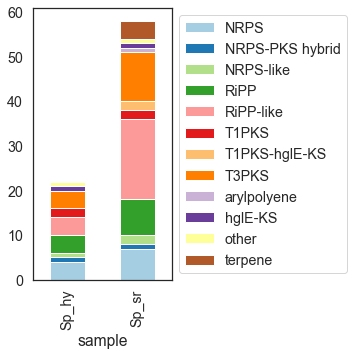

In [134]:
plot_df = Sp_unique_BGCs_unique_GCFs_overlap_summary[['BGC product class','sample']].value_counts().to_frame()
plot_df = plot_df.rename(columns={0:'count'})
plot_df = plot_df.reset_index()
plot_df = plot_df[['sample','count','BGC product class']].pivot_table(index='sample', 
                                                                            columns='BGC product class', values='count')
plot_df = plot_df.fillna(0)
plot_df.loc[:,'NRPS'] = plot_df.loc[:,'NRPS']+plot_df.loc[:,'NRPS-NRPS-like']
plot_df = plot_df.drop(columns='NRPS-NRPS-like')
# plot_df
# plot_df = plot_df[['other','terpene','RiPP','NRPS-PKS hybrid','T1PKS-hglE-KS','T1PKS','RiPP-like','hglE-KS','NRPS-like',
#                   'T3PKS','arylpolyene','NRPS']]

sb.set_theme(style='white', font_scale=1.3)
plot_df.plot(kind='bar', stacked=True, colormap='Paired', figsize=(2.5,5),)
plt.legend(bbox_to_anchor=(1, 1))

# plt.savefig('/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/Metagenome_v_cosmid_final_thesis_BGC_unique_by_product.pdf', format='pdf', bbox_inches='tight')


In [114]:
plot_df

BGC product class,other,terpene,RiPP,NRPS-PKS hybrid,T1PKS-hglE-KS,T1PKS,RiPP-like,hglE-KS,NRPS-like,T3PKS,arylpolyene,NRPS
sample,,,,,,,,,,,,
Sp_hy,1.0,NaN,2.0,1.0,NaN,1.0,2.0,1.0,1.0,2.000000,NaN,4.0
Sp_sr,NaN,1.0,1.0,1.0,1.0,1.0,16.0,NaN,1.0,1.333333,1.0,NaN


In [256]:
# Find BGCs for clinker figures
# BGC_summary_df[(BGC_summary_df['class_string'].str.contains('NRPS')) & (BGC_summary_df['sample'] != 'Sp_sr')]
# BGC_summary_df[(BGC_summary_df['class_string'].str.contains('lassopeptide')) & (BGC_summary_df['sample'] != 'Sp_sr')]
# BGC_summary_df[(BGC_summary_df['class_string'].str.contains('RRE-containing')) & (BGC_summary_df['sample'] != 'Sp_sr')]
# BGC_summary_df[(BGC_summary_df['class_string'].str.contains('LAP')) & (BGC_summary_df['sample'] != 'Sp_sr')]
BGC_summary_df[(BGC_summary_df['class_string'].str.contains('hglE-KS')) & (BGC_summary_df['sample'] != 'Sp_sr')]


,length,class,contig_edge,similarity,class_string,sample
contig_604|1,31283,[hglE-KS],False,0,hglE-KS,Sp_hy
contig_604|2,40813,[hglE-KS],False,21,hglE-KS,Sp_hy
contig_875|1,34297,[hglE-KS],True,0,hglE-KS,Sp_hy
c00007_NODE_7_..|2,46693,"[T1PKS, hglE-KS]",False,21,T1PKS-hglE-KS,MH_sr
c00007_NODE_7_..|3,46771,[hglE-KS],False,0,hglE-KS,MH_sr
c01875_NODE_18..|1,13523,"[hglE-KS, T1PKS]",True,0,T1PKS-hglE-KS,MH_sr
WLWD01005456.1|1,21855,[hglE-KS],True,0,hglE-KS,MH_hy


## Comparing BGCs in GCFs unique to a sequencing approach (excluding singletons; only Sp_sr)

In [13]:
def Create_PFAM_df(input_file, pfam_dir):
    """
    Given a network file (input_file) and the directory where the individual Pfam files are stored (pfam_dir), which
    finish in .pfs, this function will create a dataframe with the GCF membership info and the PFAMs of the BGCs
    """
    raw_df = pd.read_csv(input_file, sep='\t')
    # make a new column containing the assembly (based on BGC name)
    assembly_df = raw_df["#BGC Name"].str.split("_", n=2, expand=True)
    assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
    assembly_series = assembly_df["assembly"]
    raw_df = raw_df.join(assembly_series)
    # Had to insert this to remove MiBiG BGCs
    raw_df = raw_df.dropna()
    #Filter out singletons
    raw_df = raw_df.groupby("Family Number").filter(lambda x: len(x) > 1)
    # Make a list of the Sp_sr unique GCFs
    RiPP_GCF_lists = raw_df.groupby("Family Number")["assembly"].apply(list)
    RiPP_GCF_lists_df = pd.DataFrame(RiPP_GCF_lists)
    RiPP_GCF_lists_df["assembly"] = RiPP_GCF_lists_df["assembly"].apply(lambda x: sorted(set(x))).astype(str)
    Sp_sr_unique_list = RiPP_GCF_lists_df[RiPP_GCF_lists_df["assembly"] == "['Sp_sr']"].index.values.tolist()
    Sp_sr_unique_list
    # Get dataframe of BGCs uniques to Sp_sr
    Sp_sr_unique_df = raw_df[raw_df["Family Number"].isin(Sp_sr_unique_list)]
    # Get the PFAM information for the Sp_sr unique BGCs
    df_list = []
    for pfs in os.listdir(pfam_dir):
        #print(pfs.split(".pfs")[0])
        if pfs.split(".pfs")[0] in Sp_sr_unique_df["#BGC Name"].tolist():
            with open(pfam_dir+pfs, 'r') as f:
                df_list.append([pfs.split(".pfs")[0],f.read()])
    Sp_sr_unique_PFAM_df = pd.DataFrame(df_list, columns=["#BGC Name", "PFAMs"])
    Sp_sr_unique_summary_df = pd.merge(Sp_sr_unique_df, Sp_sr_unique_PFAM_df, on='#BGC Name', how='outer')
    return Sp_sr_unique_summary_df

In [14]:
def Filter_PFAM_df(input_df):
    """
    This function will filter a PFAM_df to remove duplicate BGCs or fragments of BGCs based on the order of PFAMs.
    NOTE that the resulting dataframe may still contain overlapping fragment of BGCs and manual curation is recommended.
    """
    # Remove duplicates
    Sp_sr_unique_PFAM_final_df = input_df.drop_duplicates(subset="PFAMs", keep="first")
    # Remove substrings
    Sp_sr_unique_final_PFAM_list = input_df.drop_duplicates(subset="PFAMs", keep="first")["PFAMs"].tolist()
    out = []
    for s in Sp_sr_unique_final_PFAM_list:
        if not any([s in r for r in Sp_sr_unique_final_PFAM_list if s != r]):
                out.append(s)
    Sp_sr_unique_PFAM_final_df = Sp_sr_unique_PFAM_final_df[Sp_sr_unique_PFAM_final_df["PFAMs"].isin(out)]
    # Remove reverse substring
    rev_out = []
    for i in Sp_sr_unique_final_PFAM_list:
        rev_string = ' '.join(i.split(" ")[::-1])
        #print(rev_string)
        if not any([rev_string in r for r in Sp_sr_unique_final_PFAM_list]):
            rev_out.append(i)
    Sp_sr_unique_PFAM_final_df = Sp_sr_unique_PFAM_final_df[Sp_sr_unique_PFAM_final_df["PFAMs"].isin(rev_out)]
    # Remove singletons
    Sp_sr_unique_PFAM_final_df = Sp_sr_unique_PFAM_final_df.groupby("Family Number").filter(lambda x: len(x) > 1)

    return Sp_sr_unique_PFAM_final_df

In [17]:
# Create dataframes for alt_3 at 0.5 cutoff and print GCFs
alt3_Others_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/Others/Others_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_Others_PFAMs_point5_filtered_df = Filter_PFAM_df(alt3_Others_PFAMs_point5_df)
alt3_Terpene_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_Terpene_PFAMs_point5_filtered_df = Filter_PFAM_df(alt3_Terpene_PFAMs_point5_df)
alt3_RiPPs_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_RiPPs_PFAMs_point5_filtered_df = Filter_PFAM_df(alt3_RiPPs_PFAMs_point5_df)
alt3_NRPS_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_NRPS_PFAMs_point5_filtered_df = Filter_PFAM_df(alt3_NRPS_PFAMs_point5_df)
alt3_PKSI_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_PKSI_PFAMs_point5_filtered_df = Filter_PFAM_df(alt3_PKSI_PFAMs_point5_df)
alt3_PKS_NRP_Hybrids_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_PKS_NRP_Hybrids_PFAMs_point5_df = Filter_PFAM_df(alt3_PKS_NRP_Hybrids_PFAMs_point5_df)
alt3_PKSother_PFAMs_point5_df = Create_PFAM_df(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.50.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_PKSother_PFAMs_point5_filtered_df = Filter_PFAM_df(alt3_PKSother_PFAMs_point5_df)

alt3_point5_PFAM_df_list = [alt3_Others_PFAMs_point5_filtered_df,alt3_Terpene_PFAMs_point5_filtered_df,
                    alt3_RiPPs_PFAMs_point5_filtered_df,alt3_NRPS_PFAMs_point5_filtered_df,
                    alt3_PKSI_PFAMs_point5_filtered_df,alt3_PKS_NRP_Hybrids_PFAMs_point5_df,
                    alt3_PKSother_PFAMs_point5_filtered_df]

for i in alt3_point5_PFAM_df_list:
    print(set(i["Family Number"].tolist()))

{2937, 2682, 2669}
{2548, 2813, 3070, 2927}
{3324, 3092, 2814}
{3325, 2654, 2431}
{3071}
{2811, 2556}
{2955, 3055, 3056, 2419, 2811, 2556, 3229}


In [18]:
# Create dataframes for alt_3 at 0.3 cutoff and print GCFs
alt3_Others_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/Others/Others_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_Others_PFAMs_point3_filtered_df = Filter_PFAM_df(alt3_Others_PFAMs_point3_df)
alt3_Terpene_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_Terpene_PFAMs_point3_filtered_df = Filter_PFAM_df(alt3_Terpene_PFAMs_point3_df)
alt3_RiPPs_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_RiPPs_PFAMs_point3_filtered_df = Filter_PFAM_df(alt3_RiPPs_PFAMs_point3_df)
alt3_NRPS_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_NRPS_PFAMs_point3_filtered_df = Filter_PFAM_df(alt3_NRPS_PFAMs_point3_df)
alt3_PKSI_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_PKSI_PFAMs_point3_filtered_df = Filter_PFAM_df(alt3_PKSI_PFAMs_point3_df)
alt3_PKS_NRP_Hybrids_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_PKS_NRP_Hybrids_PFAMs_point3_df = Filter_PFAM_df(alt3_PKS_NRP_Hybrids_PFAMs_point3_df)
alt3_PKSother_PFAMs_point3_df = Create_PFAM_df(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.30.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622_output/cache/pfs/")
alt3_PKSother_PFAMs_point3_filtered_df = Filter_PFAM_df(alt3_PKSother_PFAMs_point3_df)

alt3_point3_PFAM_df_list = [alt3_Others_PFAMs_point3_filtered_df,alt3_Terpene_PFAMs_point3_filtered_df,
                    alt3_RiPPs_PFAMs_point3_filtered_df,alt3_NRPS_PFAMs_point3_filtered_df,
                    alt3_PKSI_PFAMs_point3_filtered_df,alt3_PKS_NRP_Hybrids_PFAMs_point3_df,
                    alt3_PKSother_PFAMs_point3_filtered_df]

for i in alt3_point3_PFAM_df_list:
    print(set(i["Family Number"].tolist()))


{3304, 2937, 2669}
{2927, 2802, 2548, 2813, 3070}
{2411, 2862, 3092, 2300, 2814}
{3325, 2556, 3133}
{3071}
{2811, 2556}
{3104, 3055, 3056, 2545, 2419, 2811, 2556, 3135}


In [324]:
# Create dataframes for alt_3 at 0.1 cutoff and print GCFs
alt3_Others_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/Others/Others_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_Others_PFAMs_point1_filtered_df = Filter_PFAM_df(alt3_Others_PFAMs_point1_df)
alt3_Terpene_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_Terpene_PFAMs_point1_filtered_df = Filter_PFAM_df(alt3_Terpene_PFAMs_point1_df)
alt3_RiPPs_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_RiPPs_PFAMs_point1_filtered_df = Filter_PFAM_df(alt3_RiPPs_PFAMs_point1_df)
alt3_NRPS_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_NRPS_PFAMs_point1_filtered_df = Filter_PFAM_df(alt3_NRPS_PFAMs_point1_df)
alt3_PKSI_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_PKSI_PFAMs_point1_filtered_df = Filter_PFAM_df(alt3_PKSI_PFAMs_point1_df)
alt3_PKS_NRP_Hybrids_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_PKS_NRP_Hybrids_PFAMs_point1_df = Filter_PFAM_df(alt3_PKS_NRP_Hybrids_PFAMs_point1_df)
alt3_PKSother_PFAMs_point1_df = Create_PFAM_df(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.10.tsv"
, "/Users/vincentn/Downloads/BiG-SCAPE_alt3_200622/output/cache/pfs/")
alt3_PKSother_PFAMs_point1_filtered_df = Filter_PFAM_df(alt3_PKSother_PFAMs_point1_df)

alt3_point1_PFAM_df_list = [alt3_Others_PFAMs_point1_filtered_df,alt3_Terpene_PFAMs_point1_filtered_df,
                    alt3_RiPPs_PFAMs_point1_filtered_df,alt3_NRPS_PFAMs_point1_filtered_df,
                    alt3_PKSI_PFAMs_point1_filtered_df,alt3_PKS_NRP_Hybrids_PFAMs_point1_df,
                    alt3_PKSother_PFAMs_point1_filtered_df]

for i in alt3_point1_PFAM_df_list:
    print(set(i["Family Number"].tolist()))


{3304, 2937, 2669, 2526}
{2802, 2429, 3070, 2927}
{2411, 2544, 3092, 2300, 2814}
{3325, 2332, 3293, 2431}
{3071}
{2448, 2891, 2687, 2431}
{2496, 2546, 2397, 2878, 2431}


In [19]:
alt3_RiPPs_PFAMs_point5_filtered_df[alt3_RiPPs_PFAMs_point5_filtered_df["Family Number"] == 3092]["PFAMs"].tolist()

['PF01850.23 PF04390.14 PF06144.15 PF00171.24 PF01467.28 PF02410.17 PF02590.19 PF02545.16 PF00501.30 PF13193.8 PF05402.14 PF04055.23 PF13186.8 PF01061.26 PF00005.29 PF00005.29 PF00528.24',
 'PF00005.29 PF01061.26 PF13186.8 PF04055.23 PF05402.14 PF13193.8 PF00501.30 PF02545.16 PF02590.19 PF02410.17 PF01467.28 PF00171.24 PF06144.15 PF04390.14 PF04365.15',
 'PF04390.14 PF06144.15 PF00171.24 PF01467.28 PF02410.17 PF02590.19 PF02545.16 PF00501.30 PF13193.8 PF05402.14 PF04055.23 PF13186.8 PF01061.26 PF00005.29 PF00005.29 PF00528.24 PF09084.13']

# BGC and GCF analyses inlcuding taxonomic information

In [82]:
CAT_base_dir = "/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/CAT_compare"

In [83]:
# MH_sr_contigs = CAT_base_dir+"/MHpat_150_contigs_min5000.fasta"
MH_sr_CAT = CAT_base_dir+"/MHpat_150_out.CAT.contig2classification.names.official.txt"
# MH_sr_summary = CAT_base_dir+"/MHpat_150_summary.txt"
# MH_hy_contigs = CAT_base_dir+"/MHpat_all_GCA_012263305.1_ASM1226330v1_genomic_min5000.fasta"
MH_hy_CAT = CAT_base_dir+"/MHpat_all_out.CAT.contig2classification.names.official.txt"
# MH_hy_summary = CAT_base_dir+"/MHpat_all_summary.txt"
# Sp_sr_contigs = CAT_base_dir+"/Sp_all_sr_contigs_dedupe_min5000.fasta"
Sp_sr_CAT = CAT_base_dir+"/Sp_sr_out.CAT.contig2classification.names.official.txt"
# Sp_sr_summary = CAT_base_dir+"/Sp_sr_summary.txt"
# Sp_hy_alt3_contigs = CAT_base_dir+"/Sp_nano_1kb_alt3_racon_min5000.fasta"
Sp_hy_alt3_CAT = CAT_base_dir+"/Sp_hy_alt3_out.CAT.contig2classification.names.official.txt"
# Sp_hy_alt3_summary = CAT_base_dir+"/Sp_hy_alt3_summary.txt"


In [84]:
# Need contig pool information for Sp_sr to avoid duplicates and link with clustering files
# Make dict of unique BGC contig identifiers and check they are actually unique
gbk_count = 0
Sp_sr_BGC_dict = {}
for i in os.listdir("/Users/vincentn/Downloads/Sp_sr_deduplicated_BGC_gbks"):
    if i.endswith(".gbk"):
        gbk_count += 1
        for record in SeqIO.parse("/Users/vincentn/Downloads/Sp_sr_deduplicated_BGC_gbks/"+i, "genbank"):
            Sp_sr_BGC_dict[i.split("_")[2]+"_"+record.description.split("_")[1]] = record.description

print(gbk_count)
print(len(Sp_sr_BGC_dict))
print(len(set(list(Sp_sr_BGC_dict.keys()))))

1168
1168
1168


In [85]:
# USE the out.CAT.contig2classification.names.offcial.txt file, not the out.CAT.contig2classification.names.txt
# Need to reformat the short read dataframes in order to merge, since BGC/contig names were modified

# Could potentially use awk to select the desired column from out.CAT.contig2classification.names.txt
# Note that the below command prints the desired lines plus those that contain the word suphylum (as extra line)
# awk '{for(i=1;i<=NF;i++){if ($i ~ /(phylum)/){print $1,$3,$8,$i}}}' FS='\t' OFS='\t' Sp_hy_alt3_out.CAT.contig2classification.names.txt

# Create the Sp_sr class dataframe with the "unique_merge_id" for merging
Sp_sr_class_df = pd.read_csv(Sp_sr_CAT, sep="\t")
Sp_sr_BGC_df = pd.DataFrame.from_dict(Sp_sr_BGC_dict, orient="index")
Sp_sr_BGC_df = Sp_sr_BGC_df.reset_index()
Sp_sr_BGC_df.columns = ["unique_merger_id","# contig"]
Sp_sr_class_BGC_df = pd.merge(Sp_sr_BGC_df, Sp_sr_class_df, on="# contig")

# Read in Sp_hy class dataframe (merges on "# contig")
Sp_hy_class_df = pd.read_csv(Sp_hy_alt3_CAT, sep="\t")

# Create the MH_sr dataframe with the "class_contig_number" for merging
MH_sr_class_df = pd.read_csv(MH_sr_CAT, sep="\t")
MH_sr_class_df_numbers = MH_sr_class_df["# contig"].str.split("NODE_", expand=True)[1].str.split("_length", expand=True)
MH_sr_class_df_numbers.columns = ["class_contig_number", "blah"]
MH_sr_class_df_numbers_series = MH_sr_class_df_numbers["class_contig_number"].astype(int)
MH_sr_class_df = MH_sr_class_df.join(MH_sr_class_df_numbers_series)

# Read in MH_hy class dataframe (merges on "# contig")
MH_hy_class_df = pd.read_csv(MH_hy_CAT, sep="\t")


In [86]:
def MakeGCFandCATSummaryDF(clustering_file_path):
    """
    This function merges the CAT taxonomy information (--official-only) with GCF information for each assembly.
    It requires the class df for each assembly to have been created already (excluded since this only needs to 
    be done once). These dataframes are:
    - Sp_sr_class_BGC_df
    - Sp_hy_class_df
    - MH_sr_class_df
    - MH_hy_class_df
    """

    # Read in the clustering file
    test_df_in = pd.read_csv(clustering_file_path, sep="\t")

    # Subset Sp_sr and merge with Sp_sr_class_BGC_df
    test_df_rest = test_df_in[test_df_in["#BGC Name"].str.startswith("Sp_sr_") == False]
    test_df_Sp_sr = test_df_in[test_df_in["#BGC Name"].str.startswith("Sp_sr_")].reset_index()
    test_df_merger_df = test_df_Sp_sr["#BGC Name"].str.split("Sp_sr_", expand=True)[1].str.split("_c", expand=True)
    test_df_merger_df = test_df_merger_df.dropna().set_index(0)
    test_df_merger_df = test_df_merger_df[1].str.split("_NODE", expand=True)
    test_df_merger_df.columns = ["class_contig_number", "blah"]
    test_df_merger_df["class_contig_number"] = test_df_merger_df["class_contig_number"].astype(int)
    test_df_merger_df["unique_merger_id"] = test_df_merger_df.index.astype(str)+"_"+test_df_merger_df["class_contig_number"].astype(str)
    test_df_merger_df = test_df_merger_df.reset_index()
    test_df_merger_df_series = test_df_merger_df["unique_merger_id"].astype(str)
    test_df_Sp_sr = test_df_Sp_sr.join(test_df_merger_df_series)
    Sp_sr_out = pd.merge(test_df_Sp_sr, Sp_sr_class_BGC_df, on="unique_merger_id")

    # Subset Sp_hy and merge with Sp_hy_class_df
    test_df_Sp_hy = test_df_in[test_df_in["#BGC Name"].str.startswith("Sp_hy_")]
    test_df_Sp_hy_merger_df = test_df_Sp_hy["#BGC Name"].str.split("Sp_hy_", expand=True)[1].str.split(".region", expand=True)[0]
    test_df_Sp_hy = test_df_Sp_hy.join(test_df_Sp_hy_merger_df)
    test_df_Sp_hy.columns = ["#BGC Name","Family Number","# contig"]
    Sp_hy_out = pd.merge(test_df_Sp_hy, Sp_hy_class_df, on="# contig")

    # Subset MH_sr and merge with MH_sr_class_df
    test_df_MH_sr = test_df_in[test_df_in["#BGC Name"].str.startswith("MH_sr_")]
    test_df_MH_merger_df = test_df_MH_sr["#BGC Name"].str.split("MH_sr_c", expand=True)[1].str.split("_NODE", expand=True)[0].astype(int)
    test_df_MH_sr = test_df_MH_sr.join(test_df_MH_merger_df)
    test_df_MH_sr.columns = ["#BGC Name","Family Number","class_contig_number"]
    MH_sr_out = pd.merge(test_df_MH_sr, MH_sr_class_df, on="class_contig_number")

    # Subset MH_hy and merge with MH_hy_class_df
    test_df_MH_hy = test_df_in[test_df_in["#BGC Name"].str.startswith("MH_hy_")]
    test_df_MH_hy_merger_df = test_df_MH_hy["#BGC Name"].str.split("MH_hy_", expand=True)[1].str.split(".region", expand=True)[0]
    test_df_MH_hy = test_df_MH_hy.join(test_df_MH_hy_merger_df)
    test_df_MH_hy.columns = ["#BGC Name","Family Number","# contig"]
    MH_hy_out = pd.merge(test_df_MH_hy, MH_hy_class_df, on="# contig")

    # Columns "index", "unique_merger_id" and "class_contig_number" not needed anymore
    # Assembly information can be gathered using df["#BGC Name"].str.startswith("MH_hy_")
    summary_out_df = pd.concat([Sp_sr_out.drop(columns=["unique_merger_id","index"]), Sp_hy_out, MH_sr_out.drop(columns="class_contig_number"), MH_hy_out])
    
    return summary_out_df


In [87]:
os.listdir(bigscape_alt3_dir)

['NRPS',
 'PKSI',
 'PKS-NRP_Hybrids',
 'Others',
 'Network_Annotations_Full.tsv',
 'PKSother',
 'Terpene',
 'RiPPs']

In [88]:
# Make dataframes for 0.1 cutoff and concatenate (could include BGC_class info)
NRPS_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.10.tsv")
PKSI_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.10.tsv")
PKS_NRP_Hybrids_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.10.tsv")
Others_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/Others/Others_clustering_c0.10.tsv")
PKSother_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.10.tsv")
Terpene_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.10.tsv")
RiPPs_GCF_and_CAT_summary_df1 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.10.tsv")

point1_GCF_and_CAT_summary_df = pd.concat([NRPS_GCF_and_CAT_summary_df1,PKSI_GCF_and_CAT_summary_df1,
                                          PKS_NRP_Hybrids_GCF_and_CAT_summary_df1,Others_GCF_and_CAT_summary_df1,
                                          PKSother_GCF_and_CAT_summary_df1,Terpene_GCF_and_CAT_summary_df1,
                                          RiPPs_GCF_and_CAT_summary_df1])
# Remove duplicate BGC entries
point1_GCF_and_CAT_summary_df = point1_GCF_and_CAT_summary_df.drop_duplicates(subset="#BGC Name")

# Make dataframes for 0.3 cutoff and concatenate (could include BGC_class info)
NRPS_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.30.tsv")
PKSI_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.30.tsv")
PKS_NRP_Hybrids_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.30.tsv")
Others_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/Others/Others_clustering_c0.30.tsv")
PKSother_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.30.tsv")
Terpene_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.30.tsv")
RiPPs_GCF_and_CAT_summary_df3 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.30.tsv")

point3_GCF_and_CAT_summary_df = pd.concat([NRPS_GCF_and_CAT_summary_df3,PKSI_GCF_and_CAT_summary_df3,
                                          PKS_NRP_Hybrids_GCF_and_CAT_summary_df3,Others_GCF_and_CAT_summary_df3,
                                          PKSother_GCF_and_CAT_summary_df3,Terpene_GCF_and_CAT_summary_df3,
                                          RiPPs_GCF_and_CAT_summary_df3])
# Remove duplicate BGC entries
point3_GCF_and_CAT_summary_df = point3_GCF_and_CAT_summary_df.drop_duplicates(subset="#BGC Name")

# Make dataframes for 0.5 cutoff and concatenate (could include BGC_class info)
NRPS_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.50.tsv")
PKSI_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.50.tsv")
PKS_NRP_Hybrids_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.50.tsv")
Others_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/Others/Others_clustering_c0.50.tsv")
PKSother_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.50.tsv")
Terpene_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.50.tsv")
RiPPs_GCF_and_CAT_summary_df5 = MakeGCFandCATSummaryDF(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.50.tsv")

point5_GCF_and_CAT_summary_df = pd.concat([NRPS_GCF_and_CAT_summary_df5,PKSI_GCF_and_CAT_summary_df5,
                                          PKS_NRP_Hybrids_GCF_and_CAT_summary_df5,Others_GCF_and_CAT_summary_df5,
                                          PKSother_GCF_and_CAT_summary_df5,Terpene_GCF_and_CAT_summary_df5,
                                          RiPPs_GCF_and_CAT_summary_df5])
# Remove duplicate BGC entries
point5_GCF_and_CAT_summary_df = point5_GCF_and_CAT_summary_df.drop_duplicates(subset="#BGC Name")


In [89]:
"""
This box is merely a sanity check that numbers are consistent between the Venn diagrams and
the heatmap.
One of the inconsistencies resolved was due to the same GCF_number being used in different
network files -> added unique BGC_class_ID to GCF_number when making summary df for cutoff

Inconsistency that remains regarding index.html and .tsv file total being higher is due to
the MiBIG GCFs removed during GCF summary creation. See Note in function:
Create_uniq_GCFs_per_asembly_df.
"""

# Adding numbers on BiG-SCAPE index.html gives 507 for 0.1 cutoff
print("0.1 cutoff has "+str(507)+" GCFs in index.html and across .tsv files")
print("Number of GCFs in Venn diagram is: "+str(int(MakeCutoffGCFAssemblySummary(point1_file_list).sum())))
print("Number of GCFs in heatmap is: "+
            str(len(set(point1_GCF_and_CAT_summary_df["Family Number"].tolist()))))
Others_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/Others/Others_clustering_c0.10.tsv", sep="\t")
Terpene_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.10.tsv", sep="\t")
RiPP_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.10.tsv", sep="\t")
NRPS_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.10.tsv", sep="\t")
PKSI_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.10.tsv", sep="\t")
PKS_NRP_Hybrids_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.10.tsv", sep="\t")
PKSother_df_point1_test = pd.read_csv(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.10.tsv", sep="\t")
# Number of unique GCF IDs across all clustering files
print("Number of unique GCF IDs across all clustering files is: "
      +str(len(set(Others_df_point1_test["Family Number"].tolist()
+Terpene_df_point1_test["Family Number"].tolist()
+RiPP_df_point1_test["Family Number"].tolist()
+NRPS_df_point1_test["Family Number"].tolist()
+PKSI_df_point1_test["Family Number"].tolist()
+PKS_NRP_Hybrids_df_point1_test["Family Number"].tolist()
+PKSother_df_point1_test["Family Number"].tolist()))))

# Adding numbers on BiG-SCAPE index.html gives 324 for 0.3 cutoff
print("0.3 cutoff has "+str(324)+" GCFs in index.html and across tsv files")
print("Number of GCFs in Venn diagram is: "+str(int(MakeCutoffGCFAssemblySummary(point3_file_list).sum())))
print("Number of GCFs in heatmap is: "+
            str(len(set(point3_GCF_and_CAT_summary_df["Family Number"].tolist()))))
Others_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/Others/Others_clustering_c0.30.tsv", sep="\t")
Terpene_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.30.tsv", sep="\t")
RiPP_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.30.tsv", sep="\t")
NRPS_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.30.tsv", sep="\t")
PKSI_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.30.tsv", sep="\t")
PKS_NRP_Hybrids_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.30.tsv", sep="\t")
PKSother_df_point3_test = pd.read_csv(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.30.tsv", sep="\t")
# Number of unique GCF IDs across all clustering files
print("Number of unique GCF IDs across all clustering files is: "
      +str(len(set(Others_df_point3_test["Family Number"].tolist()
+Terpene_df_point3_test["Family Number"].tolist()
+RiPP_df_point3_test["Family Number"].tolist()
+NRPS_df_point3_test["Family Number"].tolist()
+PKSI_df_point3_test["Family Number"].tolist()
+PKS_NRP_Hybrids_df_point3_test["Family Number"].tolist()
+PKSother_df_point3_test["Family Number"].tolist()))))

# Adding numbers on BiG-SCAPE index.html gives 257 for 0.5 cutoff
print("0.5 cutoff has "+str(257)+" GCFs in index.html and across tsv files")
print("Number of GCFs in Venn diagram is: "+str(int(MakeCutoffGCFAssemblySummary(point5_file_list).sum())))
print("Number of GCFs in heatmap is: "+
            str(len(set(point5_GCF_and_CAT_summary_df["Family Number"].tolist()))))
Others_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/Others/Others_clustering_c0.50.tsv", sep="\t")
Terpene_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/Terpene/Terpene_clustering_c0.50.tsv", sep="\t")
RiPP_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/RiPPs/RiPPs_clustering_c0.50.tsv", sep="\t")
NRPS_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/NRPS/NRPS_clustering_c0.50.tsv", sep="\t")
PKSI_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/PKSI/PKSI_clustering_c0.50.tsv", sep="\t")
PKS_NRP_Hybrids_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/PKS-NRP_Hybrids/PKS-NRP_Hybrids_clustering_c0.50.tsv", sep="\t")
PKSother_df_point5_test = pd.read_csv(bigscape_alt3_dir+"/PKSother/PKSother_clustering_c0.50.tsv", sep="\t")
# Number of unique GCF IDs across all clustering files
print("Number of unique GCF IDs across all clustering files is: "
      +str(len(set(Others_df_point5_test["Family Number"].tolist()
+Terpene_df_point5_test["Family Number"].tolist()
+RiPP_df_point5_test["Family Number"].tolist()
+NRPS_df_point5_test["Family Number"].tolist()
+PKSI_df_point5_test["Family Number"].tolist()
+PKS_NRP_Hybrids_df_point5_test["Family Number"].tolist()
+PKSother_df_point5_test["Family Number"].tolist()))))

0.1 cutoff has 507 GCFs in index.html and across .tsv files
Number of GCFs in Venn diagram is: 383
Number of GCFs in heatmap is: 383
Number of unique GCF IDs across all clustering files is: 418
0.3 cutoff has 324 GCFs in index.html and across tsv files
Number of GCFs in Venn diagram is: 265
Number of GCFs in heatmap is: 265
Number of unique GCF IDs across all clustering files is: 280
0.5 cutoff has 257 GCFs in index.html and across tsv files
Number of GCFs in Venn diagram is: 217
Number of GCFs in heatmap is: 217
Number of unique GCF IDs across all clustering files is: 228


In [90]:
# Make a heatmap with assembly type by taxonomy and the number of GCFs as heat

# Make column containing assembly information and add to dataframe
point1_GCF_and_CAT_summary_df_mod = point1_GCF_and_CAT_summary_df.reset_index()
assembly_df = point1_GCF_and_CAT_summary_df_mod["#BGC Name"].str.split("_", n=2, expand=True)
assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
point1_GCF_and_CAT_summary_df_mod = point1_GCF_and_CAT_summary_df_mod.join(assembly_df["assembly"])
# Make column with standardised phylum information
phylum_df = point1_GCF_and_CAT_summary_df_mod["phylum"].str.split(":", expand=True)
phylum_df.columns = ["phylum_standardised","blah"]
point1_GCF_and_CAT_summary_df_mod = point1_GCF_and_CAT_summary_df_mod.join(phylum_df["phylum_standardised"])

# Filter dataframe to only include those GCFs unique to one assembly
point1_GCF_and_CAT_summary_df_mod = point1_GCF_and_CAT_summary_df_mod.groupby("Family Number").filter(lambda x: len(set(x["assembly"])) == 1)

# Need to standardise 'nan' and 'no support' values for "phylum_standardised"
point1_GCF_and_CAT_summary_df_mod['phylum_standardised'] = point1_GCF_and_CAT_summary_df_mod['phylum_standardised'].fillna('no support')

# Summarise data by assembly and phylum also discarding rows with several BGCs per GCF, need one row per GCF
# Assumes that GCFs are always from same phylum!!!
heatmap_df_point1 = point1_GCF_and_CAT_summary_df_mod[["phylum_standardised","Family Number","assembly"]].drop_duplicates(subset="Family Number").groupby(["phylum_standardised","assembly"])["Family Number"].count()
heatmap_df_point1.reset_index().pivot(index='phylum_standardised', columns='assembly', values='Family Number')


assembly,MH_hy,MH_sr,Sp_hy,Sp_sr
phylum_standardised,,,,
Acidobacteria,NaN,NaN,NaN,5.0
Candidatus Latescibacteria,1.0,NaN,1.0,1.0
Cyanobacteria,NaN,NaN,NaN,1.0
Firmicutes,NaN,1.0,NaN,NaN
Kiritimatiellaeota,3.0,6.0,2.0,29.0
Nitrospirae,1.0,1.0,NaN,NaN
Planctomycetes,NaN,1.0,NaN,NaN
Proteobacteria,10.0,18.0,25.0,123.0
Thaumarchaeota,NaN,NaN,1.0,NaN


In [91]:
# Sanity check to verify that BGCs/contigs in GCFs are all from the same phylum
check_phyla_point1_GCF_and_CAT_summary_df_mod = point1_GCF_and_CAT_summary_df_mod.groupby("Family Number")["phylum_standardised"].value_counts().to_frame()
check_phyla_point1_GCF_and_CAT_summary_df_mod = check_phyla_point1_GCF_and_CAT_summary_df_mod.rename(columns={"phylum_standardised":"BGC_count"})
check_phyla_point1_GCF_and_CAT_summary_df_mod = check_phyla_point1_GCF_and_CAT_summary_df_mod.reset_index()
is_multi_point1 = check_phyla_point1_GCF_and_CAT_summary_df_mod["Family Number"].value_counts() > 1
filtered_point1 = check_phyla_point1_GCF_and_CAT_summary_df_mod[check_phyla_point1_GCF_and_CAT_summary_df_mod["Family Number"].isin(is_multi_point1[is_multi_point1].index)]
filtered_point1


,Family Number,phylum_standardised,BGC_count


Text(0.5, 1.0, '0.1 cutoff')

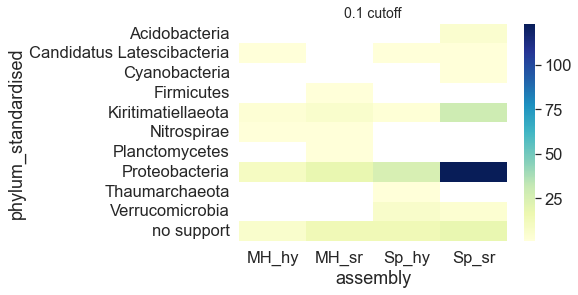

In [92]:
sb.heatmap(heatmap_df_point1.reset_index().pivot(index='phylum_standardised', columns='assembly', values='Family Number'), cmap="YlGnBu")
plt.title("0.1 cutoff", fontsize=14)
#plt.savefig("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/GCF_CAT_summary_point1_dereplicated_heatmap.png", bbox_inches='tight')


In [93]:
# Make a heatmap with assembly type by taxonomy and the number of GCFs as heat

# Make column containing assembly information and add to dataframe
point3_GCF_and_CAT_summary_df_mod = point3_GCF_and_CAT_summary_df.reset_index()
assembly_df = point3_GCF_and_CAT_summary_df_mod["#BGC Name"].str.split("_", n=2, expand=True)
assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
point3_GCF_and_CAT_summary_df_mod = point3_GCF_and_CAT_summary_df_mod.join(assembly_df["assembly"])
# Make column with standardised phylum information
phylum_df = point3_GCF_and_CAT_summary_df_mod["phylum"].str.split(":", expand=True)
phylum_df.columns = ["phylum_standardised","blah"]
point3_GCF_and_CAT_summary_df_mod = point3_GCF_and_CAT_summary_df_mod.join(phylum_df["phylum_standardised"])

# Filter dataframe to only include those GCFs unique to one assembly
point3_GCF_and_CAT_summary_df_mod = point3_GCF_and_CAT_summary_df_mod.groupby("Family Number").filter(lambda x: len(set(x["assembly"])) == 1)

# Need to standardise 'nan' and 'no support' values for "phylum_standardised"
point3_GCF_and_CAT_summary_df_mod['phylum_standardised'] = point3_GCF_and_CAT_summary_df_mod['phylum_standardised'].fillna('no support')

# Summarise data by assembly and phylum also discarding rows with several BGCs per GCF, need one row per GCF
# Assumes that GCFs are always from same phylum!!!
heatmap_df_point3 = point3_GCF_and_CAT_summary_df_mod[["phylum_standardised","Family Number","assembly"]].drop_duplicates(subset="Family Number").groupby(["phylum_standardised","assembly"])["Family Number"].count()
heatmap_df_point3.reset_index().pivot(index='phylum_standardised', columns='assembly', values='Family Number')


assembly,MH_hy,MH_sr,Sp_hy,Sp_sr
phylum_standardised,,,,
Acidobacteria,NaN,NaN,NaN,4.0
Candidatus Latescibacteria,1.0,NaN,1.0,1.0
Firmicutes,NaN,1.0,NaN,NaN
Kiritimatiellaeota,2.0,4.0,1.0,13.0
Planctomycetes,NaN,1.0,NaN,NaN
Proteobacteria,6.0,10.0,9.0,55.0
Thaumarchaeota,NaN,NaN,1.0,NaN
Verrucomicrobia,NaN,NaN,6.0,2.0
no support,6.0,13.0,10.0,12.0


In [94]:
# Sanity check to verify that BGCs/contigs in GCFs are all from the same phylum
check_phyla_point3_GCF_and_CAT_summary_df_mod = point3_GCF_and_CAT_summary_df_mod.groupby("Family Number")["phylum_standardised"].value_counts().to_frame()
check_phyla_point3_GCF_and_CAT_summary_df_mod = check_phyla_point3_GCF_and_CAT_summary_df_mod.rename(columns={"phylum_standardised":"BGC_count"})
check_phyla_point3_GCF_and_CAT_summary_df_mod = check_phyla_point3_GCF_and_CAT_summary_df_mod.reset_index()
is_multi_point3 = check_phyla_point3_GCF_and_CAT_summary_df_mod["Family Number"].value_counts() > 1
filtered_point3 = check_phyla_point3_GCF_and_CAT_summary_df_mod[check_phyla_point3_GCF_and_CAT_summary_df_mod["Family Number"].isin(is_multi_point3[is_multi_point3].index)]
filtered_point3

,Family Number,phylum_standardised,BGC_count
96,2545,Kiritimatiellaeota,4
97,2545,Proteobacteria,3


In [95]:
point3_GCF_and_CAT_summary_df_mod[point3_GCF_and_CAT_summary_df_mod["Family Number"] == 2545]

,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
796,39,Sp_sr_SpB-A12_c00344_NODE_34...region001,2545,NODE_344_length_7386_cov_4.135035,taxid assigned,based on 2/2 ORFs,1;131567;2;1783257;134625;1921781;2212465;2212...,1.00;1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Kiritimatiellaeota: 1.00,Kiritimatiellae: 1.00,NaN,NaN,NaN,Kiritimatiellae bacterium*: 1.00,Sp_sr,Kiritimatiellaeota
797,40,Sp_sr_SpB-B12_c00371_NODE_37...region001,2545,NODE_371_length_6487_cov_2.318879,taxid assigned,based on 1/1 ORFs,1;131567;2;1224;1236,1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,no support,no support,no support,no support,Sp_sr,Proteobacteria
798,41,Sp_sr_SpB-E1_c00264_NODE_26...region001,2545,NODE_264_length_11146_cov_3.112157,taxid assigned,based on 2/2 ORFs,1;131567;2;1224;1236,1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,no support,no support,no support,no support,Sp_sr,Proteobacteria
799,42,Sp_sr_SpC-A4_c00234_NODE_23...region001,2545,NODE_234_length_11472_cov_6.535743,taxid assigned,based on 1/1 ORFs,1;131567;2;1224;1236,1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,no support,no support,no support,no support,Sp_sr,Proteobacteria
800,43,Sp_sr_SpC-B3_c00186_NODE_18...region001,2545,NODE_186_length_14796_cov_5.545485,taxid assigned,based on 3/4 ORFs,1;131567;2;1783257;134625;1921781;2212465;2212...,1.00;1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Kiritimatiellaeota: 1.00,Kiritimatiellae: 1.00,NaN,NaN,NaN,Kiritimatiellae bacterium*: 1.00,Sp_sr,Kiritimatiellaeota
801,44,Sp_sr_SpC-C2_c00404_NODE_40...region001,2545,NODE_404_length_6836_cov_3.353125,taxid assigned,based on 2/3 ORFs,1;131567;2;1783257;134625;1921781;2212465;2212...,1.00;1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Kiritimatiellaeota: 1.00,Kiritimatiellae: 1.00,NaN,NaN,NaN,Kiritimatiellae bacterium*: 1.00,Sp_sr,Kiritimatiellaeota
802,45,Sp_sr_SpC-G6_c00265_NODE_26...region001,2545,NODE_265_length_7882_cov_3.153925,taxid assigned,based on 2/3 ORFs,1;131567;2;1783257;134625;1921781;2212465;2212...,1.00;1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Kiritimatiellaeota: 1.00,Kiritimatiellae: 1.00,NaN,NaN,NaN,Kiritimatiellae bacterium*: 1.00,Sp_sr,Kiritimatiellaeota


Text(0.5, 1.0, '0.3 cutoff')

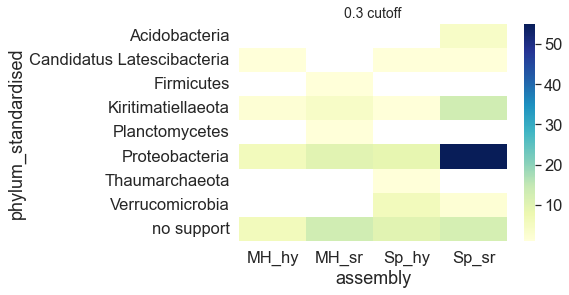

In [96]:
sb.heatmap(heatmap_df_point3.reset_index().pivot(index='phylum_standardised', columns='assembly', values='Family Number'), cmap="YlGnBu")    
plt.title("0.3 cutoff", fontsize=14)
#plt.savefig("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/GCF_CAT_summary_point3_dereplicated_heatmap.png", bbox_inches='tight')


In [97]:
# Make a heatmap with assembly type by taxonomy and the number of GCFs as heat

# Make column containing assembly information and add to dataframe
point5_GCF_and_CAT_summary_df_mod = point5_GCF_and_CAT_summary_df.reset_index()
assembly_df = point5_GCF_and_CAT_summary_df_mod["#BGC Name"].str.split("_", n=2, expand=True)
assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
point5_GCF_and_CAT_summary_df_mod = point5_GCF_and_CAT_summary_df_mod.join(assembly_df["assembly"])
# Make column with standardised phylum information
phylum_df = point5_GCF_and_CAT_summary_df_mod["phylum"].str.split(":", expand=True)
phylum_df.columns = ["phylum_standardised","blah"]
point5_GCF_and_CAT_summary_df_mod = point5_GCF_and_CAT_summary_df_mod.join(phylum_df["phylum_standardised"])

# Filter dataframe to only include those GCFs unique to one assembly
point5_GCF_and_CAT_summary_df_mod = point5_GCF_and_CAT_summary_df_mod.groupby("Family Number").filter(lambda x: len(set(x["assembly"])) == 1)

# Need to standardise 'nan' and 'no support' values for "phylum_standardised"
point5_GCF_and_CAT_summary_df_mod['phylum_standardised'] = point5_GCF_and_CAT_summary_df_mod['phylum_standardised'].fillna('no support')

# Summarise data by assembly and phylum also discarding rows with several BGCs per GCF, need one row per GCF
# Assumes that GCFs are always from same phylum!!!
heatmap_df_point5 = point5_GCF_and_CAT_summary_df_mod[["phylum_standardised","Family Number","assembly"]].drop_duplicates(subset="Family Number").groupby(["phylum_standardised","assembly"])["Family Number"].count()
heatmap_df_point5.reset_index().pivot(index='phylum_standardised', columns='assembly', values='Family Number')


assembly,MH_hy,MH_sr,Sp_hy,Sp_sr
phylum_standardised,,,,
Acidobacteria,NaN,NaN,NaN,3.0
Candidatus Latescibacteria,1.0,NaN,NaN,NaN
Kiritimatiellaeota,2.0,2.0,NaN,5.0
Planctomycetes,NaN,1.0,NaN,NaN
Proteobacteria,5.0,7.0,4.0,36.0
Thaumarchaeota,NaN,NaN,1.0,NaN
Verrucomicrobia,NaN,NaN,4.0,NaN
no support,5.0,9.0,8.0,5.0


In [98]:
# Sanity check to verify that BGCs/contigs in GCFs are all from the same phylum
check_phyla_point5_GCF_and_CAT_summary_df_mod = point5_GCF_and_CAT_summary_df_mod.groupby("Family Number")["phylum_standardised"].value_counts().to_frame()
check_phyla_point5_GCF_and_CAT_summary_df_mod = check_phyla_point5_GCF_and_CAT_summary_df_mod.rename(columns={"phylum_standardised":"BGC_count"})
check_phyla_point5_GCF_and_CAT_summary_df_mod = check_phyla_point5_GCF_and_CAT_summary_df_mod.reset_index()
is_multi_point5 = check_phyla_point5_GCF_and_CAT_summary_df_mod["Family Number"].value_counts() > 1
filtered_point5 = check_phyla_point5_GCF_and_CAT_summary_df_mod[check_phyla_point5_GCF_and_CAT_summary_df_mod["Family Number"].isin(is_multi_point5[is_multi_point5].index)]
filtered_point5

,Family Number,phylum_standardised,BGC_count
84,3070,Proteobacteria,18
85,3070,no support,1


In [99]:
point5_GCF_and_CAT_summary_df_mod[point5_GCF_and_CAT_summary_df_mod["Family Number"] == 3070]

,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
1211,253,Sp_sr_SpA-D6_c00015_NODE_15...region001,3070,NODE_15_length_37782_cov_15.569328,taxid assigned,based on 30/31 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 1.00,Sp_sr,Proteobacteria
1212,254,Sp_sr_SpA-D8_c00158_NODE_15...region001,3070,NODE_158_length_14803_cov_3.713207,taxid assigned,based on 10/11 ORFs,1;131567;2,1.00;0.60;0.52,Bacteria: 0.52,no support,no support,no support,no support,no support,no support,Sp_sr,no support
1213,255,Sp_sr_SpA-E11_c00084_NODE_84...region001,3070,NODE_84_length_26265_cov_29.346404,taxid assigned,based on 23/23 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 1.00,Sp_sr,Proteobacteria
1214,256,Sp_sr_SpA-G2_c00024_NODE_24...region001,3070,NODE_24_length_37704_cov_29.213270,taxid assigned,based on 36/38 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;0.95;0.95,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 0.95,Sp_sr,Proteobacteria
1215,257,Sp_sr_SpA-G8_c00080_NODE_80...region001,3070,NODE_80_length_25834_cov_24.765883,taxid assigned,based on 20/20 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 1.00,Sp_sr,Proteobacteria
1216,258,Sp_sr_SpB-A4_c00012_NODE_12...region001,3070,NODE_12_length_55169_cov_7.368422,taxid assigned,based on 44/44 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 1.00,Sp_sr,Proteobacteria
1217,259,Sp_sr_SpB-B9_c00005_NODE_5_...region001,3070,NODE_5_length_43950_cov_29.329844,taxid assigned,based on 36/36 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;0.97;0.97,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 0.97,Sp_sr,Proteobacteria
1218,260,Sp_sr_SpB-C3_c00015_NODE_15...region001,3070,NODE_15_length_42831_cov_28.145395,taxid assigned,based on 37/37 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 1.00,Sp_sr,Proteobacteria
1219,261,Sp_sr_SpB-D10_c00011_NODE_11...region001,3070,NODE_11_length_48779_cov_13.990427,taxid assigned,based on 47/50 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;0.96;0.96,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 0.96,Sp_sr,Proteobacteria
1220,262,Sp_sr_SpB-D1_c00102_NODE_10...region001,3070,NODE_102_length_31330_cov_8.897218,taxid assigned,based on 24/24 ORFs,1;131567;2;1224;1236;33811;1913989,1.00;1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Proteobacteria: 1.00,Gammaproteobacteria: 1.00,NaN,NaN,NaN,Gammaproteobacteria bacterium: 1.00,Sp_sr,Proteobacteria


Text(0.5, 1.0, '0.5 cutoff')

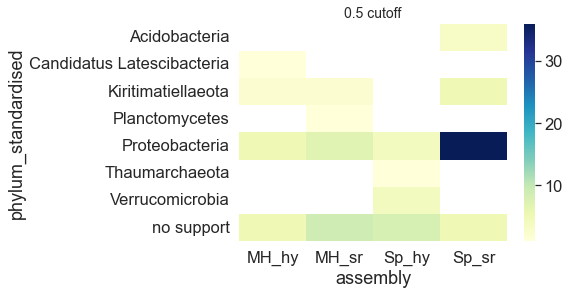

In [100]:
sb.heatmap(heatmap_df_point5.reset_index().pivot(index='phylum_standardised', columns='assembly', values='Family Number'), cmap="YlGnBu")    
plt.title("0.5 cutoff", fontsize=14)
#plt.savefig("/Users/vincentn/Documents/PhD/Metagenome_v_cosmid/GCF_CAT_summary_point5_dereplicated_heatmap.png", bbox_inches='tight')


### Identify GCFs split across multiple phyla

In [36]:
# Identify GCFs split across multiple phyla inlcuding all GCFs at 0.1 cutoff
# Make column containing assembly information and add to dataframe
point1_GCF_and_CAT_summary_df_all = point1_GCF_and_CAT_summary_df.reset_index()
assembly_df = point1_GCF_and_CAT_summary_df_all["#BGC Name"].str.split("_", n=2, expand=True)
assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
point1_GCF_and_CAT_summary_df_all = point1_GCF_and_CAT_summary_df_all.join(assembly_df["assembly"])
# Make column with standardised phylum information
phylum_df = point1_GCF_and_CAT_summary_df_all["phylum"].str.split(":", expand=True)
phylum_df.columns = ["phylum_standardised","blah"]
point1_GCF_and_CAT_summary_df_all = point1_GCF_and_CAT_summary_df_all.join(phylum_df["phylum_standardised"])

# Need to standardise 'nan' and 'no support' values for "phylum_standardised"
point1_GCF_and_CAT_summary_df_all['phylum_standardised'] = point1_GCF_and_CAT_summary_df_all['phylum_standardised'].fillna('no support')

# Find GCFs that are split across phyla
point1_GCF_and_CAT_summary_df_all_unique = point1_GCF_and_CAT_summary_df_all.groupby("Family Number")["phylum_standardised"].value_counts().to_frame()
point1_GCF_and_CAT_summary_df_all_unique = point1_GCF_and_CAT_summary_df_all_unique.rename(columns={"phylum_standardised":"BGC_count"})
point1_GCF_and_CAT_summary_df_all_unique = point1_GCF_and_CAT_summary_df_all_unique.reset_index()
is_multi_point1_unique = point1_GCF_and_CAT_summary_df_all_unique["Family Number"].value_counts() > 1
filtered_point1_unique = point1_GCF_and_CAT_summary_df_all_unique[point1_GCF_and_CAT_summary_df_all_unique["Family Number"].isin(is_multi_point1_unique[is_multi_point1_unique].index)]
filtered_point1_unique

,Family Number,phylum_standardised,BGC_count


In [37]:
# Identify GCFs split across multiple phyla inlcuding all GCFs at 0.3 cutoff
# Make column containing assembly information and add to dataframe
point3_GCF_and_CAT_summary_df_all = point3_GCF_and_CAT_summary_df.reset_index()
assembly_df = point3_GCF_and_CAT_summary_df_all["#BGC Name"].str.split("_", n=2, expand=True)
assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
point3_GCF_and_CAT_summary_df_all = point3_GCF_and_CAT_summary_df_all.join(assembly_df["assembly"])
# Make column with standardised phylum information
phylum_df = point3_GCF_and_CAT_summary_df_all["phylum"].str.split(":", expand=True)
phylum_df.columns = ["phylum_standardised","blah"]
point3_GCF_and_CAT_summary_df_all = point3_GCF_and_CAT_summary_df_all.join(phylum_df["phylum_standardised"])

# Need to standardise 'nan' and 'no support' values for "phylum_standardised"
point3_GCF_and_CAT_summary_df_all['phylum_standardised'] = point3_GCF_and_CAT_summary_df_all['phylum_standardised'].fillna('no support')

# Find GCFs that are split across phyla
point3_GCF_and_CAT_summary_df_all_unique = point3_GCF_and_CAT_summary_df_all.groupby("Family Number")["phylum_standardised"].value_counts().to_frame()
point3_GCF_and_CAT_summary_df_all_unique = point3_GCF_and_CAT_summary_df_all_unique.rename(columns={"phylum_standardised":"BGC_count"})
point3_GCF_and_CAT_summary_df_all_unique = point3_GCF_and_CAT_summary_df_all_unique.reset_index()
is_multi_point3_unique = point3_GCF_and_CAT_summary_df_all_unique["Family Number"].value_counts() > 1
filtered_point3_unique = point3_GCF_and_CAT_summary_df_all_unique[point3_GCF_and_CAT_summary_df_all_unique["Family Number"].isin(is_multi_point3_unique[is_multi_point3_unique].index)]
filtered_point3_unique

,Family Number,phylum_standardised,BGC_count
79,2111,Proteobacteria,3
80,2111,no support,1
94,2136,Proteobacteria,1
95,2136,no support,1
162,2545,Kiritimatiellaeota,4
163,2545,Proteobacteria,3


In [38]:
# Identify GCFs split across multiple phyla inlcuding all GCFs at 0.5 cutoff
# Make column containing assembly information and add to dataframe
point5_GCF_and_CAT_summary_df_all = point5_GCF_and_CAT_summary_df.reset_index()
assembly_df = point5_GCF_and_CAT_summary_df_all["#BGC Name"].str.split("_", n=2, expand=True)
assembly_df["assembly"] = assembly_df[0] + "_" + assembly_df[1]
point5_GCF_and_CAT_summary_df_all = point5_GCF_and_CAT_summary_df_all.join(assembly_df["assembly"])
# Make column with standardised phylum information
phylum_df = point5_GCF_and_CAT_summary_df_all["phylum"].str.split(":", expand=True)
phylum_df.columns = ["phylum_standardised","blah"]
point5_GCF_and_CAT_summary_df_all = point5_GCF_and_CAT_summary_df_all.join(phylum_df["phylum_standardised"])

# Need to standardise 'nan' and 'no support' values for "phylum_standardised"
point5_GCF_and_CAT_summary_df_all['phylum_standardised'] = point5_GCF_and_CAT_summary_df_all['phylum_standardised'].fillna('no support')

# Find GCFs that are split across phyla
point5_GCF_and_CAT_summary_df_all_unique = point5_GCF_and_CAT_summary_df_all.groupby("Family Number")["phylum_standardised"].value_counts().to_frame()
point5_GCF_and_CAT_summary_df_all_unique = point5_GCF_and_CAT_summary_df_all_unique.rename(columns={"phylum_standardised":"BGC_count"})
point5_GCF_and_CAT_summary_df_all_unique = point5_GCF_and_CAT_summary_df_all_unique.reset_index()
is_multi_point5_unique = point5_GCF_and_CAT_summary_df_all_unique["Family Number"].value_counts() > 1
filtered_point5_unique = point5_GCF_and_CAT_summary_df_all_unique[point5_GCF_and_CAT_summary_df_all_unique["Family Number"].isin(is_multi_point5_unique[is_multi_point5_unique].index)]
filtered_point5_unique

,Family Number,phylum_standardised,BGC_count
84,2136,Proteobacteria,1
85,2136,no support,1
86,2139,no support,3
87,2139,Proteobacteria,1
88,2139,Verrucomicrobia,1
136,2545,Kiritimatiellaeota,9
137,2545,Proteobacteria,5
138,2545,no support,2
170,2893,Kiritimatiellaeota,9
171,2893,no support,1


### Investigate GCFs unique to cosmid library sequencing (including singletons)

In [40]:
point1_GCF_and_CAT_summary_df_all[point1_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Acidobacteria"].groupby("Family Number")["assembly"].value_counts()


Family Number  assembly
2022           MH_hy        1
               MH_sr        1
               Sp_hy        1
2205           MH_hy        1
               MH_sr        1
               Sp_hy        1
               Sp_sr        1
2219           Sp_sr        1
2234           Sp_sr        1
2265           Sp_sr        1
2359           Sp_sr        6
               MH_hy        1
               MH_sr        1
               Sp_hy        1
2559           Sp_sr       13
               MH_hy        1
               MH_sr        1
               Sp_hy        1
2581           Sp_sr        6
               MH_hy        1
               MH_sr        1
               Sp_hy        1
3123           Sp_sr        2
3258           Sp_sr        1
Name: assembly, dtype: int64

In [41]:
point1_GCF_and_CAT_summary_df_all[point1_GCF_and_CAT_summary_df_all["Family Number"].isin([2219,2234,2265,3123,3258])]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
762,10,Sp_sr_SpA-A5_c00119_NODE_11...region001,2219,NODE_119_length_9521_cov_2.574506,taxid assigned,based on 10/10 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;0.95;0.70;0.62;0.62,Bacteria: 0.95,Acidobacteria: 0.70,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.62,Sp_sr,Acidobacteria
763,11,Sp_sr_SpA-B11_c00061_NODE_61...region001,2234,NODE_61_length_28134_cov_19.787444,taxid assigned,based on 26/27 ORFs,1;131567;2;57723,1.00;1.00;1.00;0.51,Bacteria: 1.00,Acidobacteria: 0.51,no support,no support,no support,no support,no support,Sp_sr,Acidobacteria
960,2,Sp_sr_SpA-B7_c00044_NODE_44...region001,2265,NODE_44_length_33203_cov_9.800085,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.99;0.99;0.99,Bacteria: 1.00,Acidobacteria: 0.99,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.99,Sp_sr,Acidobacteria
1193,235,Sp_sr_SpC-G11_c00063_NODE_63...region001,3258,NODE_63_length_33519_cov_4.823698,taxid assigned,based on 33/33 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;1.00;1.00;1.00,Bacteria: 1.00,Acidobacteria: 1.00,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 1.00,Sp_sr,Acidobacteria
1368,93,Sp_sr_SpC-B3_c00091_NODE_91...region001,3123,NODE_91_length_31269_cov_3.632531,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.96;0.96;0.96,Bacteria: 1.00,Acidobacteria: 0.96,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.96,Sp_sr,Acidobacteria
1369,94,Sp_sr_SpC-D1_c00091_NODE_91...region001,3123,NODE_91_length_31269_cov_11.506866,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.96;0.96;0.96,Bacteria: 1.00,Acidobacteria: 0.96,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.96,Sp_sr,Acidobacteria


In [42]:
point3_GCF_and_CAT_summary_df_all[point3_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Acidobacteria"].groupby("Family Number")["assembly"].value_counts()


Family Number  assembly
2022           MH_hy        1
               MH_sr        1
               Sp_hy        1
2205           MH_hy        1
               MH_sr        1
               Sp_hy        1
               Sp_sr        1
2219           Sp_sr        1
2234           Sp_sr        1
2265           Sp_sr        1
2359           Sp_sr        7
               MH_hy        1
               MH_sr        1
               Sp_hy        1
2559           Sp_sr       13
               MH_hy        1
               MH_sr        1
               Sp_hy        1
2581           Sp_sr        6
               MH_hy        1
               MH_sr        1
               Sp_hy        1
3123           Sp_sr        2
Name: assembly, dtype: int64

In [43]:
point3_GCF_and_CAT_summary_df_all[point3_GCF_and_CAT_summary_df_all["Family Number"].isin([2219,2234,2265,3123])]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
769,12,Sp_sr_SpA-A5_c00119_NODE_11...region001,2219,NODE_119_length_9521_cov_2.574506,taxid assigned,based on 10/10 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;0.95;0.70;0.62;0.62,Bacteria: 0.95,Acidobacteria: 0.70,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.62,Sp_sr,Acidobacteria
770,13,Sp_sr_SpA-B11_c00061_NODE_61...region001,2234,NODE_61_length_28134_cov_19.787444,taxid assigned,based on 26/27 ORFs,1;131567;2;57723,1.00;1.00;1.00;0.51,Bacteria: 1.00,Acidobacteria: 0.51,no support,no support,no support,no support,no support,Sp_sr,Acidobacteria
963,5,Sp_sr_SpA-B7_c00044_NODE_44...region001,2265,NODE_44_length_33203_cov_9.800085,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.99;0.99;0.99,Bacteria: 1.00,Acidobacteria: 0.99,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.99,Sp_sr,Acidobacteria
1363,88,Sp_sr_SpC-B3_c00091_NODE_91...region001,3123,NODE_91_length_31269_cov_3.632531,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.96;0.96;0.96,Bacteria: 1.00,Acidobacteria: 0.96,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.96,Sp_sr,Acidobacteria
1364,89,Sp_sr_SpC-D1_c00091_NODE_91...region001,3123,NODE_91_length_31269_cov_11.506866,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.96;0.96;0.96,Bacteria: 1.00,Acidobacteria: 0.96,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.96,Sp_sr,Acidobacteria


In [44]:
point5_GCF_and_CAT_summary_df_all[point5_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Acidobacteria"].groupby("Family Number")["assembly"].value_counts()


Family Number  assembly
2022           MH_hy        1
               MH_sr        1
               Sp_hy        1
2205           MH_hy        1
               MH_sr        1
               Sp_hy        1
               Sp_sr        1
2219           Sp_sr        1
2234           Sp_sr        1
2359           Sp_sr        8
               MH_hy        1
               MH_sr        1
               Sp_hy        1
2559           Sp_sr       13
               MH_hy        1
               MH_sr        1
               Sp_hy        1
2581           Sp_sr        6
               MH_hy        1
               MH_sr        1
               Sp_hy        1
3123           Sp_sr        2
Name: assembly, dtype: int64

In [45]:
point5_GCF_and_CAT_summary_df_all[point5_GCF_and_CAT_summary_df_all["Family Number"].isin([2219,2234,3123])]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
771,12,Sp_sr_SpA-A5_c00119_NODE_11...region001,2219,NODE_119_length_9521_cov_2.574506,taxid assigned,based on 10/10 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;0.95;0.70;0.62;0.62,Bacteria: 0.95,Acidobacteria: 0.70,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.62,Sp_sr,Acidobacteria
772,13,Sp_sr_SpA-B11_c00061_NODE_61...region001,2234,NODE_61_length_28134_cov_19.787444,taxid assigned,based on 26/27 ORFs,1;131567;2;57723,1.00;1.00;1.00;0.51,Bacteria: 1.00,Acidobacteria: 0.51,no support,no support,no support,no support,no support,Sp_sr,Acidobacteria
1346,71,Sp_sr_SpC-B3_c00091_NODE_91...region001,3123,NODE_91_length_31269_cov_3.632531,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.96;0.96;0.96,Bacteria: 1.00,Acidobacteria: 0.96,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.96,Sp_sr,Acidobacteria
1347,72,Sp_sr_SpC-D1_c00091_NODE_91...region001,3123,NODE_91_length_31269_cov_11.506866,taxid assigned,based on 28/28 ORFs,1;131567;2;57723;305072;1978231,1.00;1.00;1.00;0.96;0.96;0.96,Bacteria: 1.00,Acidobacteria: 0.96,NaN,NaN,NaN,NaN,Acidobacteria bacterium: 0.96,Sp_sr,Acidobacteria


In [46]:
# NOTE that these counts are only for Verrucomicrobia BGCs but GCFs may contain other BGCs!!
point1_GCF_and_CAT_summary_df_all[point1_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Verrucomicrobia"].groupby("Family Number")["assembly"].value_counts()


Family Number  assembly
2118           Sp_hy       1
2139           Sp_hy       1
2145           Sp_hy       1
2154           Sp_hy       1
2156           Sp_hy       1
2188           Sp_hy       1
2200           Sp_hy       1
2268           Sp_sr       1
2371           Sp_hy       1
               Sp_sr       1
2601           Sp_sr       1
3134           Sp_sr       1
3161           Sp_sr       1
Name: assembly, dtype: int64

In [47]:
point1_GCF_and_CAT_summary_df_all[point1_GCF_and_CAT_summary_df_all["Family Number"].isin(
    [2218,2139,2145,2154,2156,2188,2200,2268,2371,2601,3134,3161])]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
152,2,Sp_hy_contig_169.region001,2139,contig_169,taxid assigned,based on 82/105 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.99;0.68;0.53,Bacteria: 0.99,Verrucomicrobia: 0.53,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
155,5,Sp_hy_contig_280.region001,2145,contig_280,taxid assigned,based on 146/178 ORFs,1;131567;2;1783257;74201,1.00;1.00;1.00;0.74;0.69,Bacteria: 1.00,Verrucomicrobia: 0.69,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1012,54,Sp_sr_SpA-E10_c00152_NODE_15...region001,2371,NODE_152_length_17494_cov_37.091463,taxid assigned,based on 20/20 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.90;0.89;0.79;0.79,Bacteria: 1.00,Verrucomicrobia: 0.89,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.79,Sp_sr,Verrucomicrobia
1099,141,Sp_sr_SpB-B12_c00174_NODE_17...region001,2601,NODE_174_length_20360_cov_4.032822,taxid assigned,based on 21/21 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.86;0.85;0.76;0.76,Bacteria: 1.00,Verrucomicrobia: 0.85,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.76,Sp_sr,Verrucomicrobia
1192,234,Sp_sr_SpC-E10_c00038_NODE_38...region001,3161,NODE_38_length_33939_cov_4.927719,taxid assigned,based on 29/30 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.88;0.88;0.74;0.74,Bacteria: 1.00,Verrucomicrobia: 0.88,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.74,Sp_sr,Verrucomicrobia
1234,3,Sp_hy_contig_388.region001,2154,contig_388,taxid assigned,based on 328/401 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.97;0.62;0.52,Bacteria: 0.97,Verrucomicrobia: 0.52,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1235,4,Sp_hy_contig_391.region001,2156,contig_391,taxid assigned,based on 178/204 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.97;0.70;0.61,Bacteria: 0.97,Verrucomicrobia: 0.61,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1238,7,Sp_hy_contig_632.region001,2188,contig_632,taxid assigned,based on 67/78 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.83;0.81;0.62;0.62,Bacteria: 1.00,Verrucomicrobia: 0.81,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.62,Sp_hy,Verrucomicrobia
1241,10,Sp_hy_contig_33.region001,2371,contig_33,taxid assigned,based on 390/470 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.96;0.63;0.57,Bacteria: 0.96,Verrucomicrobia: 0.57,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1285,10,Sp_sr_SpA-B7_c00174_NODE_17...region001,2268,NODE_174_length_11397_cov_6.320853,taxid assigned,based on 8/9 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.51;0.51;0.51;0.51,Bacteria: 1.00,Verrucomicrobia: 0.51,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.51,Sp_sr,Verrucomicrobia


In [48]:
point3_GCF_and_CAT_summary_df_all[point3_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Verrucomicrobia"].groupby("Family Number")["assembly"].value_counts()


Family Number  assembly
2118           Sp_hy       1
2139           Sp_hy       1
2145           Sp_hy       1
2151           Sp_sr       2
               Sp_hy       1
2154           Sp_hy       1
2156           Sp_hy       1
2200           Sp_hy       1
2268           Sp_sr       1
3134           Sp_sr       1
3161           Sp_hy       1
               Sp_sr       1
Name: assembly, dtype: int64

In [49]:
point3_GCF_and_CAT_summary_df_all[point3_GCF_and_CAT_summary_df_all["Family Number"].isin(
    [2218,2139,2145,2151,2154,2156,2200,2268,3134,3161])]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
152,2,Sp_hy_contig_169.region001,2139,contig_169,taxid assigned,based on 82/105 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.99;0.68;0.53,Bacteria: 0.99,Verrucomicrobia: 0.53,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
155,5,Sp_hy_contig_280.region001,2145,contig_280,taxid assigned,based on 146/178 ORFs,1;131567;2;1783257;74201,1.00;1.00;1.00;0.74;0.69,Bacteria: 1.00,Verrucomicrobia: 0.69,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
959,1,Sp_sr_SpA-E10_c00152_NODE_15...region001,2151,NODE_152_length_17494_cov_37.091463,taxid assigned,based on 20/20 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.90;0.89;0.79;0.79,Bacteria: 1.00,Verrucomicrobia: 0.89,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.79,Sp_sr,Verrucomicrobia
960,2,Sp_sr_SpB-B12_c00174_NODE_17...region001,2151,NODE_174_length_20360_cov_4.032822,taxid assigned,based on 21/21 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.86;0.85;0.76;0.76,Bacteria: 1.00,Verrucomicrobia: 0.85,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.76,Sp_sr,Verrucomicrobia
1230,272,Sp_sr_SpC-E10_c00038_NODE_38...region001,3161,NODE_38_length_33939_cov_4.927719,taxid assigned,based on 29/30 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.88;0.88;0.74;0.74,Bacteria: 1.00,Verrucomicrobia: 0.88,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.74,Sp_sr,Verrucomicrobia
1234,3,Sp_hy_contig_33.region001,2151,contig_33,taxid assigned,based on 390/470 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.96;0.63;0.57,Bacteria: 0.96,Verrucomicrobia: 0.57,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1235,4,Sp_hy_contig_388.region001,2154,contig_388,taxid assigned,based on 328/401 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.97;0.62;0.52,Bacteria: 0.97,Verrucomicrobia: 0.52,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1236,5,Sp_hy_contig_391.region001,2156,contig_391,taxid assigned,based on 178/204 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.97;0.70;0.61,Bacteria: 0.97,Verrucomicrobia: 0.61,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
1244,13,Sp_hy_contig_632.region001,3161,contig_632,taxid assigned,based on 67/78 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.83;0.81;0.62;0.62,Bacteria: 1.00,Verrucomicrobia: 0.81,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.62,Sp_hy,Verrucomicrobia
1289,14,Sp_sr_SpA-B7_c00174_NODE_17...region001,2268,NODE_174_length_11397_cov_6.320853,taxid assigned,based on 8/9 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.51;0.51;0.51;0.51,Bacteria: 1.00,Verrucomicrobia: 0.51,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.51,Sp_sr,Verrucomicrobia


In [54]:
point5_GCF_and_CAT_summary_df_all[point5_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Verrucomicrobia"].groupby("Family Number")["assembly"].value_counts()


Family Number  assembly
2118           Sp_sr       2
               Sp_hy       1
2139           Sp_hy       1
2145           Sp_hy       1
2151           Sp_sr       2
               Sp_hy       1
2154           Sp_hy       1
2156           Sp_hy       1
2200           Sp_hy       1
3161           Sp_hy       1
               Sp_sr       1
Name: assembly, dtype: int64

In [53]:
point5_GCF_and_CAT_summary_df_all[point5_GCF_and_CAT_summary_df_all["Family Number"].isin(
    [2218,2139,2145,2151,2154,2156,2200,3161])]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
1,1,Sp_sr_SpB-B10_c00092_NODE_92...region001,2139,NODE_92_length_32312_cov_4.669202,taxid assigned,based on 12/12 ORFs,1;131567;2;1224,1.00;1.00;0.95;0.55,Bacteria: 0.95,Proteobacteria: 0.55,no support,no support,no support,no support,no support,Sp_sr,Proteobacteria
153,3,Sp_hy_contig_169.region001,2139,contig_169,taxid assigned,based on 82/105 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.99;0.68;0.53,Bacteria: 0.99,Verrucomicrobia: 0.53,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
154,4,Sp_hy_contig_280.region001,2145,contig_280,taxid assigned,based on 146/178 ORFs,1;131567;2;1783257;74201,1.00;1.00;1.00;0.74;0.69,Bacteria: 1.00,Verrucomicrobia: 0.69,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia
767,8,Sp_sr_SpA-B2_c00074_NODE_74...region001,2139,NODE_74_length_25762_cov_6.607489,taxid assigned,based on 14/14 ORFs,1;131567;2,1.00;1.00;0.95,Bacteria: 0.95,no support,no support,no support,no support,no support,no support,Sp_sr,no support
768,9,Sp_sr_SpA-G7_c00129_NODE_12...region001,2139,NODE_129_length_20154_cov_10.633308,taxid assigned,based on 14/14 ORFs,1;131567;2,1.00;1.00;0.94,Bacteria: 0.94,no support,no support,no support,no support,no support,no support,Sp_sr,no support
769,10,Sp_sr_SpC-C4_c00185_NODE_18...region001,2139,NODE_185_length_17443_cov_17.490141,taxid assigned,based on 14/14 ORFs,1;131567;2,1.00;1.00;0.94,Bacteria: 0.94,no support,no support,no support,no support,no support,no support,Sp_sr,no support
962,4,Sp_sr_SpA-E10_c00152_NODE_15...region001,2151,NODE_152_length_17494_cov_37.091463,taxid assigned,based on 20/20 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.90;0.89;0.79;0.79,Bacteria: 1.00,Verrucomicrobia: 0.89,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.79,Sp_sr,Verrucomicrobia
963,5,Sp_sr_SpB-B12_c00174_NODE_17...region001,2151,NODE_174_length_20360_cov_4.032822,taxid assigned,based on 21/21 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.86;0.85;0.76;0.76,Bacteria: 1.00,Verrucomicrobia: 0.85,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.76,Sp_sr,Verrucomicrobia
1230,272,Sp_sr_SpC-E10_c00038_NODE_38...region001,3161,NODE_38_length_33939_cov_4.927719,taxid assigned,based on 29/30 ORFs,1;131567;2;1783257;74201;417295;2026799,1.00;1.00;1.00;0.88;0.88;0.74;0.74,Bacteria: 1.00,Verrucomicrobia: 0.88,NaN,NaN,NaN,NaN,Verrucomicrobia bacterium: 0.74,Sp_sr,Verrucomicrobia
1234,3,Sp_hy_contig_33.region001,2151,contig_33,taxid assigned,based on 390/470 ORFs,1;131567;2;1783257;74201,1.00;1.00;0.96;0.63;0.57,Bacteria: 0.96,Verrucomicrobia: 0.57,no support,no support,no support,no support,no support,Sp_hy,Verrucomicrobia


In [52]:
# Thaumarchaeota BGCs and GCFs are all the same in three cutoffs used
point1_GCF_and_CAT_summary_df_all[point1_GCF_and_CAT_summary_df_all["phylum_standardised"] == "Thaumarchaeota"]


,index,#BGC Name,Family Number,# contig,classification,reason,lineage,lineage scores,superkingdom,phylum,class,order,family,genus,species,assembly,phylum_standardised
1405,9,Sp_hy_contig_60.region001,2180,contig_60,taxid assigned,based on 20/21 ORFs,1;131567;2157;1783275;651137,1.00;1.00;0.95;0.79;0.63,Archaea: 0.95,Thaumarchaeota: 0.63,no support,no support,no support,no support,no support,Sp_hy,Thaumarchaeota
1418,0,MH_sr_c00117_NODE_11...region001,1929,NODE_117_length_96170_cov_54.195163,taxid assigned,based on 105/106 ORFs,1;131567;2157;1783275;651137;31932;338190;338191,1.00;1.00;0.91;0.90;0.84;0.60;0.59;0.58,Archaea: 0.91,Thaumarchaeota: 0.84,NaN,Nitrosopumilales: 0.60,Nitrosopumilaceae: 0.59,Nitrosopumilus: 0.58,no support,MH_sr,Thaumarchaeota
1438,0,MH_hy_WLWD01000003.1.region001,1929,WLWD01000003.1,taxid assigned,based on 2130/2187 ORFs,1;131567;2157;1783275;651137;31932;338190;3381...,1.00;1.00;0.94;0.92;0.91;0.73;0.70;0.70;0.62;0.62,Archaea: 0.94,Thaumarchaeota: 0.91,NaN,Nitrosopumilales: 0.73,Nitrosopumilaceae: 0.70,Nitrosopumilus: 0.70,Nitrosopumilus sp.: 0.62,MH_hy,Thaumarchaeota
